In [1596]:
import pandas as pd
import numpy as np

# Investigating the new scraped DataFrame

In [1597]:
# opening the csv file and saving it in a df variable 
df = pd.read_csv('LatestData.csv')

In [1598]:
# creating a copy of the oirinal data frame, to avoid changing the original data by mistake
df_copy = df.copy()

In [1599]:
df.shape

(3201, 1273)

In [1600]:
#during the data crawing, ali express randomly changed the html page source code, so on some smartphones, we could only scrape the outside data, without the specs (rating, price, title, sold), so we first want to remove all those rows with only 4 values. there are 1273 columns, and we want the rows that have at least 1268 non nan values.
num_missing_values = df_copy.isna().sum(axis=1)
df_copy = df_copy.loc[(num_missing_values < 1268) & 
            (num_missing_values != 1269) & 
            (num_missing_values != 1270) & 
            (num_missing_values != 1271) & 
            (num_missing_values != 1272) &
            (num_missing_values != 1273)]

In [1601]:
df_copy.shape

(3158, 1273)

In [1602]:
df_copy.describe(include='all')

Unnamed: 0                                              Title  \
count      3158.00                                               3158   
unique         nan                                               2065   
top            nan  Nokia G21 6GB 128GB 4G Smartphone 6.5 inch Dis...   
freq           nan                                                  7   
mean       1610.41                                                NaN   
std         922.77                                                NaN   
min           1.00                                                NaN   
25%         802.25                                                NaN   
50%        1619.50                                                NaN   
75%        2408.75                                                NaN   
max        3200.00                                                NaN   

            Price    Sold  rating IP68/IP69K Charging Power Touch Screen  \
count        3158    2904 2353.00        769           2985         2987   
unique       2420     475     nan          4             29            2   
top     ₪1,114.46  1 sold     nan        YES          Other          Yes   
freq            6     213     nan        395           1636         2928   
mean          NaN     NaN    4.73        NaN            NaN          NaN   
std           NaN     NaN    0.55        NaN            NaN          NaN   
min           NaN     NaN    1.00        NaN            NaN          NaN   
25%           NaN     NaN    4.70        NaN            NaN          NaN   
50%           NaN     NaN    4.90        NaN            NaN          NaN   
75%           NaN     NaN    5.00        NaN            NaN          NaN   
max           NaN     NaN    5.00        NaN            NaN          NaN   

            Memory Card Type Battery Capacity Range Rear Camera Quantity  \
count                   1435                   1725                 2997   
unique                     3                      8                   11   
top     Shared with SIM slot          4500-5999 mAh                    3   
freq                     583                    872                 1061   
mean                     NaN                    NaN                  NaN   
std                      NaN                    NaN                  NaN   
min                      NaN                    NaN                  NaN   
25%                      NaN                    NaN                  NaN   
50%                      NaN                    NaN                  NaN   
75%                      NaN                    NaN                  NaN   
max                      NaN                    NaN                  NaN   

       Wireless Charging   NFC    Biometrics Technology  \
count               2995  2499                     2991   
unique                 7    29                       30   
top                   NO   YES  Fingerprint Recognition   
freq                2571  1534                      514   
mean                 NaN   NaN                      NaN   
std                  NaN   NaN                      NaN   
min                  NaN   NaN                      NaN   
25%                  NaN   NaN                      NaN   
50%                  NaN   NaN                      NaN   
75%                  NaN   NaN                      NaN   
max                  NaN   NaN                      NaN   

       Charging Interface Type Front Camera Quantity 3.5mm Headphone Port  \
count                     2996                  2997                 2997   
unique                       7                     7                    4   
top                     Type-C                     1                  YES   
freq                      2395                  2813                 1778   
mean                       NaN                   NaN                  NaN   
std                        NaN                   NaN                  NaN   
min                        NaN                   NaN     

In [1603]:
# set pandas options to display all columns and limit the number of rows to 5
pd.options.display.max_columns = None  # display all columns
# display only up to 5 rows

# display statistics for all columns in the data frame
print(df_copy.describe(include='all'))

        Unnamed: 0                                              Title  \
count      3158.00                                               3158   
unique         nan                                               2065   
top            nan  Nokia G21 6GB 128GB 4G Smartphone 6.5 inch Dis...   
freq           nan                                                  7   
mean       1610.41                                                NaN   
std         922.77                                                NaN   
min           1.00                                                NaN   
25%         802.25                                                NaN   
50%        1619.50                                                NaN   
75%        2408.75                                                NaN   
max        3200.00                                                NaN   

            Price    Sold  rating IP68/IP69K Charging Power Touch Screen  \
count        3158    2904 2353.00        769   

In [1604]:
#most of the columns had too many nan values. we wanted to clean all of them and we decided to clean most of the irelevant columns with a big amount of nan values. rating will be the column with the least amount of real values and we decided to clean everything under 2352.
df_copy = df_copy.loc[:, df_copy.notna().sum() >= 2352]

In [1605]:
df_copy.head()

,Unnamed: 0,Title,Price,Sold,rating,Charging Power,Touch Screen,Rear Camera Quantity,Wireless Charging,NFC,Biometrics Technology,Charging Interface Type,Front Camera Quantity,3.5mm Headphone Port,Fast Charging,Screen Type,Rear Camera Pixel,Front Camera Pixel,Battery Capacity(mAh),Battery Type,Display Resolution,SIM Card Quantity,Language,Display Size,Operation System,Item Condition,Design,Brand Name,Origin,Certification
1,1,Blackview BV4900 Pro Android 12 IP68 Waterproo...,₪406.33,23 sold,5.00,Other,Yes,1,NO,Yes,Face Recognition,Micro USB,1,YES,Nonsupport,Normal Screen,13MP,5mp,5580,Not Detachable,720*1440,2 SIM Card,"English,Russian,German,French,Spanish,Polish,P...",5.7,Android,New,bar,BLACKVIEW,Mainland China,CE
2,2,Unihertz TANK Larger Battery Rugged Smartphone...,"₪1,240.63",633 sold,4.90,Other,Yes,3,NO,YES,"Fingerprint Recognition,Face Recognition",Type-C,1,YES,USB-PD,Normal Screen,≈108MP,32MP,Other,Not Detachable,2340x1080,2 SIM Card,"English,Russian,German,French,Spanish,Polish,P...",6.81“,Android,New,Flip,unihertz,Mainland China,"CE,FCC,RoHS"
3,3,"Cubot P60 Smartphone 6.517"" Octa-Core Android ...",₪438.82,21 sold,4.90,Other,Yes,2,NO,NO,"Side-mounted,Face Recognition",Type-C,1,NO,Other,Water Drop Screen,20MP,8MP,5000,Not Detachable,1600x720,2 SIM Card,"English,Russian,German,French,Spanish,Polish,P...",6.517,Android,New,bar,Cubot,Mainland China,"CE,RoHS,WEEE"
4,4,[World Premiere] Blackview Oscal S80 Rugged Ph...,₪658.89,260 sold,nan,33W,Yes,3,NO,YES,Fingerprint Recognition,Type-C,1,NO,Adaptive Fast Charge,Normal Screen,12MP,8MP,13000,Not Detachable,2048x1080,2 SIM Card,"English,Russian,German,French,Spanish,Polish,P...",6.58,Android,New,bar,BLACKVIEW,Mainland China,NaN
5,5,Blackview A95 Smartphone 8GB+128GB Octa Core A...,₪575.71,14 sold,4.80,18W,Yes,3,NO,NO,Side-mounted,Type-C,1,NO,Other,Normal Screen,20MP,8MP,4380,Not Detachable,1600x720,2 SIM Card,"English,Russian,German,French,Spanish,Polish,P...","6.52""",Android,New,bar,DOOGEE,Mainland China,CE


In [1606]:
#in the first cleaning stage, we would like to remove characters like ₪ from the Price column so we can work with numbers only
df_copy['Price'] = df_copy['Price'].str.replace('[\₪,]', '').astype(float)
#we would also like to remove the 'sold' word, after the numeric value in each value of the column 'sold'.
df_copy['Sold'] = df_copy['Sold'].fillna(0).str.replace(' sold', '')
#Removing any string inside the 'Battery Capacity(mAh)' column.
df_copy['Battery Capacity(mAh)'] = df_copy['Battery Capacity(mAh)'].str.extract('(\d+)')

#extract the integer values from the following columns.
df_copy['Front Camera Pixel'] = df_copy['Front Camera Pixel'].str.extract('(\d+)')
df_copy['Rear Camera Pixel'] = df_copy['Rear Camera Pixel'].str.extract('(\d+)')
df_copy['Display Size'] = df_copy['Display Size'].str.extract('(\d+\.\d+|\d+)').astype(float)

#we also notice that we have a column named 'Battery Type'. our conclution was that it was irelevant to the buyers quality list in a smartphone. we removed it.
df_copy = df_copy.drop('Battery Type', axis=1)
df_copy = df_copy.drop_duplicates()

In [1607]:
#the following commands will calculate the average rating. than we will insert the average rating into the missing values.
avg_rating = df_copy['rating'].mean()
df_copy['rating'].fillna(avg_rating, inplace=True)

In [1608]:
df_copy.describe(include='all')

,Unnamed: 0,Title,Price,Sold,rating,Charging Power,Touch Screen,Rear Camera Quantity,Wireless Charging,NFC,Biometrics Technology,Charging Interface Type,Front Camera Quantity,3.5mm Headphone Port,Fast Charging,Screen Type,Rear Camera Pixel,Front Camera Pixel,Battery Capacity(mAh),Display Resolution,SIM Card Quantity,Language,Display Size,Operation System,Item Condition,Design,Brand Name,Origin,Certification
count,3158.00,3158,3158.00,2904,3158.00,2985,2987,2997,2995,2499,2991,2996,2997,2997,3008,2999,2900,2876,2958,2998,3009,3003,2984.00,2993,3010,2996,3133,3150,2702
unique,nan,2065,nan,475,nan,29,2,11,7,29,30,7,7,4,42,30,24,22,198,217,10,221,nan,17,4,10,94,12,25
top,nan,Nokia G21 6GB 128GB 4G Smartphone 6.5 inch Dis...,nan,1,nan,Other,Yes,3,NO,YES,Fingerprint Recognition,Type-C,1,YES,Adaptive Fast Charge,Normal Screen,13,16,5000,2400x1080,2 SIM Card,"English,Russian,German,French,Spanish,Polish,P...",nan,Android,New,bar,XIAOMI,Mainland China,CE
freq,nan,7,nan,213,nan,1636,2928,1061,2571,1534,514,2395,2813,1778,842,905,449,797,819,714,2613,1539,nan,2783,2382,2701,915,3009,1594
mean,1610.41,NaN,959.05,NaN,4.73,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.19,NaN,NaN,NaN,NaN,NaN,NaN
std,922.77,NaN,9517.74,NaN,0.48,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.88,NaN,NaN,NaN,NaN,NaN,NaN
min,1.00,NaN,0.04,NaN,1.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.00,NaN,NaN,NaN,NaN,NaN,NaN
25%,802.25,NaN,409.37,NaN,4.73,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.09,NaN,NaN,NaN,NaN,NaN,NaN
50%,1619.50,NaN,627.31,NaN,4.80,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.52,NaN,NaN,NaN,NaN,NaN,NaN
75%,2408.75,NaN,1050.84,NaN,5.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.67,NaN,NaN,NaN,NaN,NaN,NaN


In [1609]:
#fixing all types of yes no and other and changing it to numbers
str_to_int = {'YES': 1, 'Yes': 1, 'yes': 1, 'NO': 0, 'No': 0, 'no': 0, 'New': 1, 'Brand New': 1, 'Refurbished': 0, 'Used': 0}
cols_to_replace = {'Wireless Charging': str_to_int, 'NFC': str_to_int, 'Touch Screen': str_to_int, 'Item Condition': str_to_int, '3.5mm Headphone Port': str_to_int}
df_copy = df_copy.replace(cols_to_replace)

In [1610]:
df_copy.head()

,Unnamed: 0,Title,Price,Sold,rating,Charging Power,Touch Screen,Rear Camera Quantity,Wireless Charging,NFC,Biometrics Technology,Charging Interface Type,Front Camera Quantity,3.5mm Headphone Port,Fast Charging,Screen Type,Rear Camera Pixel,Front Camera Pixel,Battery Capacity(mAh),Display Resolution,SIM Card Quantity,Language,Display Size,Operation System,Item Condition,Design,Brand Name,Origin,Certification
1,1,Blackview BV4900 Pro Android 12 IP68 Waterproo...,406.33,23,5.00,Other,1.00,1,0,1,Face Recognition,Micro USB,1,1.00,Nonsupport,Normal Screen,13,5,5580,720*1440,2 SIM Card,"English,Russian,German,French,Spanish,Polish,P...",5.70,Android,1.00,bar,BLACKVIEW,Mainland China,CE
2,2,Unihertz TANK Larger Battery Rugged Smartphone...,1240.63,633,4.90,Other,1.00,3,0,1,"Fingerprint Recognition,Face Recognition",Type-C,1,1.00,USB-PD,Normal Screen,108,32,NaN,2340x1080,2 SIM Card,"English,Russian,German,French,Spanish,Polish,P...",6.81,Android,1.00,Flip,unihertz,Mainland China,"CE,FCC,RoHS"
3,3,"Cubot P60 Smartphone 6.517"" Octa-Core Android ...",438.82,21,4.90,Other,1.00,2,0,0,"Side-mounted,Face Recognition",Type-C,1,0.00,Other,Water Drop Screen,20,8,5000,1600x720,2 SIM Card,"English,Russian,German,French,Spanish,Polish,P...",6.52,Android,1.00,bar,Cubot,Mainland China,"CE,RoHS,WEEE"
4,4,[World Premiere] Blackview Oscal S80 Rugged Ph...,658.89,260,4.73,33W,1.00,3,0,1,Fingerprint Recognition,Type-C,1,0.00,Adaptive Fast Charge,Normal Screen,12,8,13000,2048x1080,2 SIM Card,"English,Russian,German,French,Spanish,Polish,P...",6.58,Android,1.00,bar,BLACKVIEW,Mainland China,NaN
5,5,Blackview A95 Smartphone 8GB+128GB Octa Core A...,575.71,14,4.80,18W,1.00,3,0,0,Side-mounted,Type-C,1,0.00,Other,Normal Screen,20,8,4380,1600x720,2 SIM Card,"English,Russian,German,French,Spanish,Polish,P...",6.52,Android,1.00,bar,DOOGEE,Mainland China,CE


In [1611]:
#we Defined a function to extract and multiply the numbers in the 'Display Resolution' column
def resolution_to_score(resolution):
    if pd.isna(resolution):
        return np.nan
    #parts contains the value before the x or * and the value after the symbol. we split them up to multiply them after
    parts = resolution.split('x') if 'x' in resolution else resolution.split('*')
    if len(parts) != 2:
        return np.nan
    try:
        return int(parts[0]) * int(parts[1])
    except ValueError:
        return np.nan

# Convert the 'Display Resolution' column to strings using astype() method
df_copy['Display Resolution'] = df_copy['Display Resolution'].astype(str)

# Use the apply() method to apply the resolution_to_score function to each value in the 'Display Resolution' column
df_copy['Display Resolution'] = df_copy['Display Resolution'].apply(resolution_to_score)

In [1612]:
df_copy.head()

,Unnamed: 0,Title,Price,Sold,rating,Charging Power,Touch Screen,Rear Camera Quantity,Wireless Charging,NFC,Biometrics Technology,Charging Interface Type,Front Camera Quantity,3.5mm Headphone Port,Fast Charging,Screen Type,Rear Camera Pixel,Front Camera Pixel,Battery Capacity(mAh),Display Resolution,SIM Card Quantity,Language,Display Size,Operation System,Item Condition,Design,Brand Name,Origin,Certification
1,1,Blackview BV4900 Pro Android 12 IP68 Waterproo...,406.33,23,5.00,Other,1.00,1,0,1,Face Recognition,Micro USB,1,1.00,Nonsupport,Normal Screen,13,5,5580,1036800.00,2 SIM Card,"English,Russian,German,French,Spanish,Polish,P...",5.70,Android,1.00,bar,BLACKVIEW,Mainland China,CE
2,2,Unihertz TANK Larger Battery Rugged Smartphone...,1240.63,633,4.90,Other,1.00,3,0,1,"Fingerprint Recognition,Face Recognition",Type-C,1,1.00,USB-PD,Normal Screen,108,32,NaN,2527200.00,2 SIM Card,"English,Russian,German,French,Spanish,Polish,P...",6.81,Android,1.00,Flip,unihertz,Mainland China,"CE,FCC,RoHS"
3,3,"Cubot P60 Smartphone 6.517"" Octa-Core Android ...",438.82,21,4.90,Other,1.00,2,0,0,"Side-mounted,Face Recognition",Type-C,1,0.00,Other,Water Drop Screen,20,8,5000,1152000.00,2 SIM Card,"English,Russian,German,French,Spanish,Polish,P...",6.52,Android,1.00,bar,Cubot,Mainland China,"CE,RoHS,WEEE"
4,4,[World Premiere] Blackview Oscal S80 Rugged Ph...,658.89,260,4.73,33W,1.00,3,0,1,Fingerprint Recognition,Type-C,1,0.00,Adaptive Fast Charge,Normal Screen,12,8,13000,2211840.00,2 SIM Card,"English,Russian,German,French,Spanish,Polish,P...",6.58,Android,1.00,bar,BLACKVIEW,Mainland China,NaN
5,5,Blackview A95 Smartphone 8GB+128GB Octa Core A...,575.71,14,4.80,18W,1.00,3,0,0,Side-mounted,Type-C,1,0.00,Other,Normal Screen,20,8,4380,1152000.00,2 SIM Card,"English,Russian,German,French,Spanish,Polish,P...",6.52,Android,1.00,bar,DOOGEE,Mainland China,CE


In [1613]:
print(df['Charging Power'].value_counts())

Other                                                1636
18W                                                   496
33W                                                   338
120W                                                  125
65W                                                   108
67W                                                    80
30W                                                    48
22.5W                                                  24
20W                                                    19
50W                                                    19
80W                                                    18
150W                                                   17
44W                                                     9
40W                                                     9
125W                                                    7
Supports 18W fast charging,10W in-box charger           5
67W wired turbo charging                                5
100W          

In [1614]:
#we can see that in the 'Charging power' columnd, most of our values(1636) are named 'other', which is why this columnd is irelevant. hence, we will remove it. 
df_copy.drop("Charging Power", axis=1, inplace=True)

In [1615]:
#problematic column that is supposed to represent the different types of charging technologies.
print(df['Fast Charging'].value_counts())

Adaptive Fast Charge                                                     842
Nonsupport                                                               592
Other                                                                    520
SuperCharge                                                              276
Quick Charge 3.0                                                         224
SuperVOOC                                                                102
Charge Turbo                                                              82
USB-PD                                                                    63
Quick Charge 2.0                                                          38
Quick Charge 4.0                                                          38
Quick Charge 4.0+                                                         34
Xiaomi HyperCharge                                                        32
FlashCharge                                                               31

In [1616]:
#we can see that in the 'Fast Charging' columnn most of the data is 'Other' and 'Nonsupport' therefor we deleted the colum, irelevant to our study.
df_copy.drop("Fast Charging", axis=1, inplace=True)

In [1617]:
df_copy['Operation System'].value_counts()

Android                  2783
IOS                        69
MIUI 13                    32
Others                     29
Dumbphone OS               22
Android 11                 17
Other Smartphone OS        11
Android 12                  5
Android 10.0                5
Symbian                     3
iOS                         3
No Smartphone               3
Android 11 Go Edition       3
Windows Mobile              3
Android 10                  2
Android12.0                 2
MIUI 14                     1
Name: Operation System, dtype: int64

In [1618]:
#We are converting all types of Android to numaric number 1 , IOS to number 2 
op_system_converter = {'Android':1, 'Android 11':1 , 'Android 12':1, 'Android 10.0':1, 'Android 11 Go Edition':1, 'Android 10':1, 'Android12.0':1, 'IOS':2, 'iOS':2}
op_system = {'Operation System':op_system_converter}
df_copy = df_copy.replace(op_system)

In [1619]:
# we have 2 main operating systems - 'Android' and 'IOS'. we wanted to put all the 'underdog' operating system in a different category that will be represented by the number 0.
for index, value in df_copy['Operation System'].iteritems():
    if value != 1 and value != 2:
        df_copy.loc[index, 'Operation System'] = 0

In [1620]:
df_copy['Operation System'].value_counts()

1    2817
0     269
2      72
Name: Operation System, dtype: int64

In [1621]:
df_copy.head(30)

,Unnamed: 0,Title,Price,Sold,rating,Touch Screen,Rear Camera Quantity,Wireless Charging,NFC,Biometrics Technology,Charging Interface Type,Front Camera Quantity,3.5mm Headphone Port,Screen Type,Rear Camera Pixel,Front Camera Pixel,Battery Capacity(mAh),Display Resolution,SIM Card Quantity,Language,Display Size,Operation System,Item Condition,Design,Brand Name,Origin,Certification
1,1,Blackview BV4900 Pro Android 12 IP68 Waterproo...,406.33,23,5.00,1.00,1,0,1,Face Recognition,Micro USB,1,1.00,Normal Screen,13,5,5580,1036800.00,2 SIM Card,"English,Russian,German,French,Spanish,Polish,P...",5.70,1,1.00,bar,BLACKVIEW,Mainland China,CE
2,2,Unihertz TANK Larger Battery Rugged Smartphone...,1240.63,633,4.90,1.00,3,0,1,"Fingerprint Recognition,Face Recognition",Type-C,1,1.00,Normal Screen,108,32,NaN,2527200.00,2 SIM Card,"English,Russian,German,French,Spanish,Polish,P...",6.81,1,1.00,Flip,unihertz,Mainland China,"CE,FCC,RoHS"
3,3,"Cubot P60 Smartphone 6.517"" Octa-Core Android ...",438.82,21,4.90,1.00,2,0,0,"Side-mounted,Face Recognition",Type-C,1,0.00,Water Drop Screen,20,8,5000,1152000.00,2 SIM Card,"English,Russian,German,French,Spanish,Polish,P...",6.52,1,1.00,bar,Cubot,Mainland China,"CE,RoHS,WEEE"
4,4,[World Premiere] Blackview Oscal S80 Rugged Ph...,658.89,260,4.73,1.00,3,0,1,Fingerprint Recognition,Type-C,1,0.00,Normal Screen,12,8,13000,2211840.00,2 SIM Card,"English,Russian,German,French,Spanish,Polish,P...",6.58,1,1.00,bar,BLACKVIEW,Mainland China,NaN
5,5,Blackview A95 Smartphone 8GB+128GB Octa Core A...,575.71,14,4.80,1.00,3,0,0,Side-mounted,Type-C,1,0.00,Normal Screen,20,8,4380,1152000.00,2 SIM Card,"English,Russian,German,French,Spanish,Polish,P...",6.52,1,1.00,bar,DOOGEE,Mainland China,CE
6,6,SERVO X7 Plus Mini Smartphone Android Rugged L...,249.58,5,4.73,1.00,1,0,1,Fingerprint Recognition,Micro USB,1,1.00,Normal Screen,8,2,3100,103680.00,2 SIM Card,"English,Russian,German,French,Spanish,Polish,P...",4.00,1,1.00,bar,SERVO,Mainland China,NONE
7,7,OUKITEL WP18 Pro IP68 Rugged Phone MTK6762 And...,510.76,20,4.73,1.00,2,0,1,"Fingerprint Recognition,Face Recognition",Type-C,1,0.00,Normal Screen,13,5,12500,1036800.00,2 SIM Card,"English,Russian,German,French,Spanish,Polish,P...",5.93,1,1.00,bar,OUKITEL,Mainland China,NaN
8,8,"Original Cellphone Xiaomi Redmi 5A Smartphone,...",168.74,438,4.50,1.00,1,0,0,Face Recognition,Micro USB,1,1.00,Normal Screen,13,5,3000,921600.00,2 SIM Card,"English,Russian,German,French,Spanish,Polish,P...",5.00,1,0.00,bar,XIAOMI,Mainland China,NONE
9,9,2023 Original Note 11 Pro Smartphone Android 5...,275.90,2,4.73,nan,NaN,NaN,NaN,NaN,NaN,NaN,nan,NaN,NaN,NaN,NaN,nan,NaN,NaN,nan,0,nan,NaN,x-bo,Mainland China,CE
10,10,Samsung Galaxy A10e Octa-core 5.83 Inches Sing...,284.84,313,4.50,1.00,1,0,1,NO,Type-C,1,1.00,Normal Screen,8,5,3000,1123200.00,1 SIM Card,"English,Russian,German,French,Spanish,Polish,P...",5.80,1,0.00,bar,Samsung,KR(Origin),NONE


In [1622]:
df_copy['Charging Interface Type'].value_counts()

Type-C       2395
Micro USB     426
Other          95
Linghting      56
TYPE-C         12
Mini USB       11
DOCK            1
Name: Charging Interface Type, dtype: int64

In [1623]:
df_copy['Display Size'].value_counts()

6.67     385
6.50     216
6.53     163
6.70     133
6.52     122
        ... 
15.60      1
5.71       1
5.40       1
6.52       1
3.49       1
Name: Display Size, Length: 100, dtype: int64

In [1624]:
df_copy['Certification'].value_counts()

CE                         1594
NONE                        621
CE,FCC                      221
CE,RoHS,WEEE                 66
CE,FCC,RoHS                  64
CE,RoHS                      50
CE,FCC,RoHS,WEEE             14
FCC                          12
CE,EAC                       11
CE,NONE                       8
CE,FCC,RoHS,pse               8
CE,EAC,FCC                    8
CE,RoHS,UL                    4
CE,FCC,RoHS,UL                3
IP68/IP69K/MIL-STD-810G       3
RoHS                          2
Dot                           2
CE,RoHS,pse                   2
RoHS,CE                       2
CE,FCC,RoHS,pse,WEEE          2
CE,FCC,RoHS,KC                1
IP68/IP69K                    1
RoHS,WEEE                     1
RoHS,WEEE,CE,RoHS,WEEE        1
CE,FCC,pse                    1
Name: Certification, dtype: int64

In [1625]:
#removing more irelevant columns 
df_copy.drop("Certification", axis=1, inplace=True)

In [1626]:
df_copy['Screen Type'].value_counts()

Normal Screen                                                               905
Full Screen                                                                 671
Fullview Display                                                            586
Water Drop Screen                                                           504
Other                                                                       138
Curved Screen                                                                67
Full Screen,Normal Screen                                                    20
Curved Screen,Full Screen                                                    18
Flexible Screen                                                              17
Full Screen,Fullview Display                                                 14
Full Screen,Water Drop Screen                                                14
Other,Normal Screen                                                           9
Folded Screen                           

In [1627]:
df_copy['Biometrics Technology'].value_counts()

Fingerprint Recognition                                                                     514
Side-mounted,Face Recognition                                                               485
Face Recognition                                                                            452
Fingerprint Recognition,Face Recognition                                                    444
NO                                                                                          288
Side-mounted                                                                                177
In-Screen Fingerprint Recognition,Face Recognition                                          119
In-Screen Fingerprint Recognition                                                           107
Side-mounted,Fingerprint Recognition,Face Recognition                                        88
Rear-mounted                                                                                 69
Face Recognition,Rear-mounted           

In [1628]:
#for the same reason that we removed the 'Language' column, we decided to remove "Biometrics Technology". too many values supporting multiple technologies. 
df_copy.drop("Biometrics Technology", axis=1, inplace=True)

In [1629]:
df_copy['Language'].value_counts()

English,Russian,German,French,Spanish,Polish,Portuguese,Italian,Turkish,Norwegian,Korean,Japanese,Arabic    1539
English,Russian,German,French,Spanish,Polish,Portuguese,Italian,Turkish,Korean,Japanese,Arabic               227
English                                                                                                      153
English,Russian,German,French,Spanish,Polish,Portuguese,Italian,Korean,Japanese,Arabic                       124
English,Russian,French,Korean,Japanese,Arabic                                                                 76
                                                                                                            ... 
Italian,Arabic,French,Russian,Spanish,Japanese,Polish,English,Portuguese,Korean                                1
English,Russian,German,French,Spanish,Portuguese,Italian,Norwegian,Korean,Japanese,Arabic                      1
Global language switchable                                                                      

In [1630]:
#problematic data. the Language column had values that repeated each other with different combinations. also, people will always choose the phone that is supported by their own language.
df_copy.drop("Language", axis=1, inplace=True)

In [1631]:
df_copy['Design'].value_counts()

bar                         2701
Flip                         251
Slider                        11
Watch                         10
BAR                            8
Rotatable                      6
Magnetic pop-up triggers       4
Watch,bar                      2
Flip,bar                       2
Plain                          1
Name: Design, dtype: int64

In [1632]:
df_copy['NFC'].value_counts()

1                                      1553
0                                       894
Support                                   6
Supported                                 5
Subway traffic                            5
support                                   4
Support, Google Pay available             4
Smartphone                                3
FLIR                                      2
G8441 with NFC,SO-02K No NFC              2
2.4G/5G WLAN                              2
Supports Google Pay                       2
supports Google Pay                       2
Smartpone                                 2
NFC//FM/SIM/OTG                           1
SUPPORT                                   1
Global                                    1
Support, Google Pay available,Phone       1
Cellular                                  1
Waterproof                                1
Octa-core                                 1
Unlock Cellphone                          1
128GB Expansion                 

In [1633]:
df_copy['Brand Name'].value_counts()

XIAOMI       915
realme       209
OUKITEL      205
BLACKVIEW    202
Samsung      128
            ... 
KIMDOOLE       1
M-REMOTE       1
SanDisk        1
YESSKO         1
Nothing        1
Name: Brand Name, Length: 94, dtype: int64

In [1634]:
df_copy['SIM Card Quantity'].value_counts()

2 SIM Card                       2613
1 SIM Card                        306
1 SIM Card+1 eSIM                  26
Other                              22
2 SIM Card,1 SIM Card              14
3 SIM Cards                        11
Single SIM Card                    11
Dual SIM Cards                      4
1 SIM Card,2 SIM Card               1
Single sim and Dual SIM Cards       1
Name: SIM Card Quantity, dtype: int64

In [1635]:
#removing more irelevant columns 
df_copy.drop("SIM Card Quantity", axis=1, inplace=True)

In [1636]:
#conversion like we did on top
charging_type_converter = {'Type-C':1, 'TYPE-C':1 , 'Micro USB':2, 'Mini USB':2, 'Linghting':3, 'DOCK':4, 'Other':5}
charging_type = {'Charging Interface Type':charging_type_converter}
df_copy = df_copy.replace(charging_type)

In [1637]:
df_copy.head()

,Unnamed: 0,Title,Price,Sold,rating,Touch Screen,Rear Camera Quantity,Wireless Charging,NFC,Charging Interface Type,Front Camera Quantity,3.5mm Headphone Port,Screen Type,Rear Camera Pixel,Front Camera Pixel,Battery Capacity(mAh),Display Resolution,Display Size,Operation System,Item Condition,Design,Brand Name,Origin
1,1,Blackview BV4900 Pro Android 12 IP68 Waterproo...,406.33,23,5.00,1.00,1,0,1,2.00,1,1.00,Normal Screen,13,5,5580,1036800.00,5.70,1,1.00,bar,BLACKVIEW,Mainland China
2,2,Unihertz TANK Larger Battery Rugged Smartphone...,1240.63,633,4.90,1.00,3,0,1,1.00,1,1.00,Normal Screen,108,32,NaN,2527200.00,6.81,1,1.00,Flip,unihertz,Mainland China
3,3,"Cubot P60 Smartphone 6.517"" Octa-Core Android ...",438.82,21,4.90,1.00,2,0,0,1.00,1,0.00,Water Drop Screen,20,8,5000,1152000.00,6.52,1,1.00,bar,Cubot,Mainland China
4,4,[World Premiere] Blackview Oscal S80 Rugged Ph...,658.89,260,4.73,1.00,3,0,1,1.00,1,0.00,Normal Screen,12,8,13000,2211840.00,6.58,1,1.00,bar,BLACKVIEW,Mainland China
5,5,Blackview A95 Smartphone 8GB+128GB Octa Core A...,575.71,14,4.80,1.00,3,0,0,1.00,1,0.00,Normal Screen,20,8,4380,1152000.00,6.52,1,1.00,bar,DOOGEE,Mainland China


In [1638]:
df_copy['Origin'].value_counts()

Mainland China    3009
KR(Origin)          47
JP(Origin)          20
Hongkong China      18
VN(Origin)          17
CN(Origin)          10
HU(Origin)           8
FI(Origin)           8
US(Origin)           7
DE(Origin)           4
FR(Origin)           1
Taiwan China         1
Name: Origin, dtype: int64

In [1639]:
#almost all the smartphones in our dataframe are made in china, only a small percentage was not made in china, and the amount of smartphones that were made outside of china is too small to be relevant.
df_copy.drop("Origin", axis=1, inplace=True)

# checking if there is a nan value in the DataFrame columns

In [1640]:
#checking if there is a nan value in the 'Sold' column
df_copy['Sold'].isna().any()

True

In [1641]:
#replacing each nan value with the value 0, since sold values that contain 'nan', represent smartphones that no one has purchased.
df_copy['Sold'] = df_copy['Sold'].fillna(0)

In [1642]:
#checking if there is a nan value in the 'Touch Screen' column
df_copy['Touch Screen'].isna().any()

True

In [1643]:
#find the most frequent value in the column
most_frequent_ts = df_copy['Touch Screen'].mode()[0] 
df_copy['Touch Screen'] = df_copy['Touch Screen'].fillna(most_frequent_ts)

In [1644]:
df_copy['Touch Screen'].isna().any()

False

In [1645]:
#checking if there is a nan value in the 'Rear Camera Quantity' column
df_copy['Rear Camera Quantity'].isna().any()

True

In [1646]:
#find the most frequent value in the column
most_frequent_rcq = df_copy['Rear Camera Quantity'].mode()[0] 
df_copy['Rear Camera Quantity'] = df_copy['Rear Camera Quantity'].fillna(most_frequent_rcq)

In [1647]:
df_copy['Rear Camera Quantity'].isna().any()

False

In [1648]:
#checking if there is a nan value in the 'Wireless Charging' column
df_copy['Wireless Charging'].isna().any()

True

In [1649]:
#find the most frequent value in the column
most_frequent_wc = df_copy['Wireless Charging'].mode()[0] 
df_copy['Wireless Charging'] = df_copy['Wireless Charging'].fillna(most_frequent_wc)

In [1650]:
df_copy['Wireless Charging'].isna().any()

False

In [1651]:
#checking if there is a nan value in the 'NFC' column
df_copy['NFC'].isna().any()

True

In [1652]:
#find the most frequent value in the column
most_frequent_nfc = df_copy['NFC'].mode()[0] 
df_copy['NFC'] = df_copy['NFC'].fillna(most_frequent_nfc)

In [1653]:
df_copy['NFC'].isna().any()

False

In [1654]:
#checking if there is a nan value in the 'Charging Interface Type' column
df_copy['Charging Interface Type'].isna().any()

True

In [1655]:
#find the most frequent value in the column
most_frequent_cit = df_copy['Charging Interface Type'].mode()[0] 
df_copy['Charging Interface Type'] = df_copy['Charging Interface Type'].fillna(most_frequent_cit)

In [1656]:
df_copy['Charging Interface Type'].isna().any()

False

In [1657]:
#checking if there is a nan value in the 'Front Camera Quantity' column
df_copy['Front Camera Quantity'].isna().any()

True

In [1658]:
#find the most frequent value in the column
most_frequent_FCQ = df_copy['Front Camera Quantity'].mode()[0] 
df_copy['Front Camera Quantity'] = df_copy['Front Camera Quantity'].fillna(most_frequent_FCQ)

In [1659]:
df_copy['Front Camera Quantity'].isna().any()

False

In [1660]:
#checking if there is a nan value in the '3.5mm Headphone Port' column
df_copy['3.5mm Headphone Port'].isna().any()

True

In [1661]:
#find the most frequent value in the column
most_frequent_MHP = df_copy['3.5mm Headphone Port'].mode()[0] 
df_copy['3.5mm Headphone Port'] = df_copy['3.5mm Headphone Port'].fillna(most_frequent_MHP)

In [1662]:
df_copy['3.5mm Headphone Port'].isna().any()

False

In [1663]:
#checking if there is a nan value in the 'Screen Type' column
df_copy['Screen Type'].isna().any()

True

In [1664]:
#find the most frequent value in the column
most_frequent_st = df_copy['Screen Type'].mode()[0] 
df_copy['Screen Type'] = df_copy['Screen Type'].fillna(most_frequent_st)

In [1665]:
df_copy['Screen Type'].isna().any()

False

In [1666]:
#checking if there is a nan value in the 'Rear Camera Pixel' column
df_copy['Rear Camera Pixel'].isna().any()

True

In [1667]:
#find the most frequent value in the column
df_copy['Rear Camera Pixel'] = pd.to_numeric(df_copy['Rear Camera Pixel'])
#average_rcp = df_copy['Rear Camera Pixel'].mean() 
average_rcp = df_copy['Rear Camera Pixel'].mean()
df_copy['Rear Camera Pixel'] = df_copy['Rear Camera Pixel'].fillna(average_rcp)

In [1668]:
df_copy['Rear Camera Pixel'].isna().any()

False

In [1669]:
#checking if there is a nan value in the 'Front Camera Pixel' column
df_copy['Front Camera Pixel'].isna().any()

True

In [1670]:
#find the average value in the column
df_copy['Front Camera Pixel'] = pd.to_numeric(df_copy['Front Camera Pixel'])
average_fcp = df_copy['Front Camera Pixel'].mean() 

df_copy['Front Camera Pixel'] = df_copy['Front Camera Pixel'].fillna(average_fcp)

In [1671]:
df_copy['Front Camera Pixel'].isna().any()

False

In [1672]:
#checking if there is a nan value in the 'Battery Capacity(mAh)' column
df_copy['Battery Capacity(mAh)'].isna().any()

True

In [1673]:
#fixing the errors caused by strings inside some values
df_copy['Battery Capacity(mAh)'] = pd.to_numeric(df_copy['Battery Capacity(mAh)'])
#find the average value in the column
average_bc = df_copy['Battery Capacity(mAh)'].mean()

df_copy['Battery Capacity(mAh)'] = df_copy['Battery Capacity(mAh)'].fillna(average_bc)
pd.options.display.float_format = '{:.2f}'.format

In [1674]:
df_copy['Battery Capacity(mAh)'].isna().any()

False

In [1675]:
#checking if there is a nan value in the 'Display Resolution' column
df_copy['Display Resolution'].isna().any()

True

In [1676]:
#find the average value in the column
average_dr = df_copy['Display Resolution'].mean()

df_copy['Display Resolution'] = df_copy['Display Resolution'].fillna(average_dr)

In [1677]:
df_copy['Display Resolution'].isna().any()

False

In [1678]:
df_copy['Display Size'].isna().any()

True

In [1679]:
#find the most frequent value in the column
most_frequent_ds = df_copy['Display Size'].mode()[0] 
df_copy['Display Size'] = df_copy['Display Size'].fillna(most_frequent_ds)

In [1680]:
#checking if there is a nan value in the 'Operation System' column
df_copy['Operation System'].isna().any()

False

In [1681]:
#checking if there is a nan value in the 'Item Condition' column
df_copy['Item Condition'].isna().any()


True

In [1682]:
#find the most frequent value in the column
most_frequent_ic = df_copy['Item Condition'].mode()[0] 
df_copy['Item Condition'] = df_copy['Item Condition'].fillna(most_frequent_ic)

In [1683]:
df_copy['Item Condition'].isna().any()

False

In [1684]:
#checking if there is a nan value in the 'Design' column
df_copy['Design'].isna().any()

True

In [1685]:
#find the most frequent value in the column
most_frequent_des = df_copy['Design'].mode()[0] 
df_copy['Design'] = df_copy['Design'].fillna(most_frequent_des)

In [1686]:
df_copy['Design'].isna().any()

False

In [1687]:
#checking if there is a nan value in the 'Brand Name' column
df_copy['Brand Name'].isna().any()

True

In [1688]:
#find the most frequent value in the column
most_frequent_brand = df_copy['Brand Name'].mode()[0] 
df_copy['Brand Name'] = df_copy['Brand Name'].fillna(most_frequent_brand)

In [1689]:
df_copy['Brand Name'].isna().any()

False

In [1690]:
nan_sum = df_copy.isna().sum().sum()
nan_sum


0

# Eda

In [1691]:
df_copy.describe(include='all')

,Unnamed: 0,Title,Price,Sold,rating,Touch Screen,Rear Camera Quantity,Wireless Charging,NFC,Charging Interface Type,Front Camera Quantity,3.5mm Headphone Port,Screen Type,Rear Camera Pixel,Front Camera Pixel,Battery Capacity(mAh),Display Resolution,Display Size,Operation System,Item Condition,Design,Brand Name
count,3158.00,3158,3158.00,3158.00,3158.00,3158.00,3158,3158.00,3158.00,3158.00,3158,3158.00,3158,3158.00,3158.00,3158.00,3158.00,3158.00,3158.00,3158.00,3158,3158
unique,nan,2065,nan,476.00,nan,nan,11,5.00,27.00,nan,7,nan,30,nan,nan,nan,nan,nan,3.00,nan,10,94
top,nan,Nokia G21 6GB 128GB 4G Smartphone 6.5 inch Dis...,nan,0.00,nan,nan,3,0.00,1.00,nan,1,nan,Normal Screen,nan,nan,nan,nan,nan,1.00,nan,bar,XIAOMI
freq,nan,7,nan,254.00,nan,nan,1222,2748.00,2212.00,nan,2974,nan,1064,nan,nan,nan,nan,nan,2817.00,nan,2863,940
mean,1610.41,NaN,959.05,nan,4.73,0.98,NaN,nan,nan,1.30,NaN,0.62,NaN,40.66,13.75,2710095521266.89,2029517.01,6.22,nan,0.80,NaN,NaN
std,922.77,NaN,9517.74,nan,0.48,0.14,NaN,nan,nan,0.78,NaN,0.49,NaN,30.67,8.71,142650091255242.78,963569.15,0.86,nan,0.40,NaN,NaN
min,1.00,NaN,0.04,nan,1.00,0.00,NaN,nan,nan,1.00,NaN,0.00,NaN,1.00,0.00,0.00,6240.00,1.00,nan,0.00,NaN,NaN
25%,802.25,NaN,409.37,nan,4.73,1.00,NaN,nan,nan,1.00,NaN,0.00,NaN,13.00,8.00,4200.00,1152000.00,6.10,nan,1.00,NaN,NaN
50%,1619.50,NaN,627.31,nan,4.80,1.00,NaN,nan,nan,1.00,NaN,1.00,NaN,40.66,13.75,5000.00,2332800.00,6.52,nan,1.00,NaN,NaN
75%,2408.75,NaN,1050.84,nan,5.00,1.00,NaN,nan,nan,1.00,NaN,1.00,NaN,50.00,16.00,5180.00,2592000.00,6.67,nan,1.00,NaN,NaN


In [1692]:
print(df_copy['Sold'].dtype)


object


In [1693]:
df_copy['NFC'].value_counts()

1                                      2212
0                                       894
Support                                   6
Supported                                 5
Subway traffic                            5
support                                   4
Support, Google Pay available             4
Smartphone                                3
FLIR                                      2
G8441 with NFC,SO-02K No NFC              2
2.4G/5G WLAN                              2
Supports Google Pay                       2
supports Google Pay                       2
Smartpone                                 2
NFC//FM/SIM/OTG                           1
SUPPORT                                   1
Global                                    1
Support, Google Pay available,Phone       1
Cellular                                  1
Waterproof                                1
Octa-core                                 1
Unlock Cellphone                          1
128GB Expansion                 

In [1694]:
#changing all columns to float for easy way to work on the machine learning
df_copy['Sold'] = df_copy['Sold'].astype(float)
df_copy['Display Size'] = df_copy['Display Size'].astype(float)
df_copy['Display Resolution'] = df_copy['Display Resolution'].astype(float)
#changing all others to be 3 they are irrelevant
df_copy.loc[(df_copy['NFC'] != 1) & (df_copy['NFC'] != 0), 'NFC'] = 3

In [1695]:
#checking that convert has worked
print(df_copy['Sold'].dtype)

float64


In [1696]:
df_copy.describe(include='all')

,Unnamed: 0,Title,Price,Sold,rating,Touch Screen,Rear Camera Quantity,Wireless Charging,NFC,Charging Interface Type,Front Camera Quantity,3.5mm Headphone Port,Screen Type,Rear Camera Pixel,Front Camera Pixel,Battery Capacity(mAh),Display Resolution,Display Size,Operation System,Item Condition,Design,Brand Name
count,3158.00,3158,3158.00,3158.00,3158.00,3158.00,3158,3158.00,3158.00,3158.00,3158,3158.00,3158,3158.00,3158.00,3158.00,3158.00,3158.00,3158.00,3158.00,3158,3158
unique,nan,2065,nan,nan,nan,nan,11,5.00,3.00,nan,7,nan,30,nan,nan,nan,nan,nan,3.00,nan,10,94
top,nan,Nokia G21 6GB 128GB 4G Smartphone 6.5 inch Dis...,nan,nan,nan,nan,3,0.00,1.00,nan,1,nan,Normal Screen,nan,nan,nan,nan,nan,1.00,nan,bar,XIAOMI
freq,nan,7,nan,nan,nan,nan,1222,2748.00,2212.00,nan,2974,nan,1064,nan,nan,nan,nan,nan,2817.00,nan,2863,940
mean,1610.41,NaN,959.05,130.59,4.73,0.98,NaN,nan,nan,1.30,NaN,0.62,NaN,40.66,13.75,2710095521266.89,2029517.01,6.22,nan,0.80,NaN,NaN
std,922.77,NaN,9517.74,473.72,0.48,0.14,NaN,nan,nan,0.78,NaN,0.49,NaN,30.67,8.71,142650091255242.78,963569.15,0.86,nan,0.40,NaN,NaN
min,1.00,NaN,0.04,0.00,1.00,0.00,NaN,nan,nan,1.00,NaN,0.00,NaN,1.00,0.00,0.00,6240.00,1.00,nan,0.00,NaN,NaN
25%,802.25,NaN,409.37,3.00,4.73,1.00,NaN,nan,nan,1.00,NaN,0.00,NaN,13.00,8.00,4200.00,1152000.00,6.10,nan,1.00,NaN,NaN
50%,1619.50,NaN,627.31,15.00,4.80,1.00,NaN,nan,nan,1.00,NaN,1.00,NaN,40.66,13.75,5000.00,2332800.00,6.52,nan,1.00,NaN,NaN
75%,2408.75,NaN,1050.84,68.75,5.00,1.00,NaN,nan,nan,1.00,NaN,1.00,NaN,50.00,16.00,5180.00,2592000.00,6.67,nan,1.00,NaN,NaN


In [1697]:
df_copy['Rear Camera Quantity'].value_counts()

3       1222
1        568
2        494
4        354
3.0      272
4.0       75
1.0       74
2.0       69
NONE      17
5         11
5.0        2
Name: Rear Camera Quantity, dtype: int64

In [1698]:
#fixing number to be the same - data problems
df_copy['Rear Camera Quantity'] = df_copy['Rear Camera Quantity'].replace({4.0: 4, 5.0: 5, 3.0:3,1.0:1,2.0:2,'NONE':0})
df_copy['Rear Camera Quantity'] = df_copy['Rear Camera Quantity'].astype(int)

In [1699]:
df_copy['Rear Camera Quantity'].value_counts()

3    1494
1     642
2     563
4     429
0      17
5      13
Name: Rear Camera Quantity, dtype: int64

In [1700]:
df_copy['Wireless Charging'].value_counts()

0                                2748
1                                 407
50W Wireless Charging               1
Support 50W Wireless Charging       1
15W wireless charging               1
Name: Wireless Charging, dtype: int64

In [1701]:
#changing all others to be 3 they are irrelevant
df_copy['Wireless Charging'] = df_copy['Wireless Charging'].astype(str)
df_copy['Wireless Charging'] = df_copy['Wireless Charging'].replace({'50W Wireless Charging': 0,'15W wireless charging':0,'Support 50W Wireless Charging':0})
df_copy['Wireless Charging'] = df_copy['Wireless Charging'].astype(int)
df_copy['Wireless Charging'].value_counts()

0    2751
1     407
Name: Wireless Charging, dtype: int64

In [1702]:
df_copy['NFC'] = df_copy['NFC'].astype(int)
df_copy['NFC'].value_counts()

1    2212
0     894
3      52
Name: NFC, dtype: int64

In [1703]:
df_copy['Front Camera Quantity'].value_counts()

1        2974
2          68
NONE       48
Other      27
3          19
4          19
5           3
Name: Front Camera Quantity, dtype: int64

In [1704]:
#fixing data None means 0 and we decided to place other as 1 cause he is the most common value here
df_copy['Front Camera Quantity'] = df_copy['Front Camera Quantity'].replace({'NONE':0,'Other':1})
df_copy['Front Camera Quantity'] = df_copy['Front Camera Quantity'].astype(int)

In [1705]:
df_copy['Front Camera Quantity'].value_counts()

1    3001
2      68
0      48
3      19
4      19
5       3
Name: Front Camera Quantity, dtype: int64

In [1706]:
df_copy['Operation System'].value_counts()

1    2817
0     269
2      72
Name: Operation System, dtype: int64

In [1707]:
df_copy['Operation System'] = df_copy['Operation System'].astype(int)
df_copy['Operation System'].value_counts()

1    2817
0     269
2      72
Name: Operation System, dtype: int64

In [1708]:
#creating codes to each brand that we got, we got 94 brands. and we added new column for that named 'brand name id'
df_brand= df_copy["Brand Name"]
df_brand = df_brand.astype('category')
df_brand = df_brand.cat.codes
df_copy.insert(22,'Brand Name ID',df_brand)

In [1709]:
df_copy.head()

,Unnamed: 0,Title,Price,Sold,rating,Touch Screen,Rear Camera Quantity,Wireless Charging,NFC,Charging Interface Type,Front Camera Quantity,3.5mm Headphone Port,Screen Type,Rear Camera Pixel,Front Camera Pixel,Battery Capacity(mAh),Display Resolution,Display Size,Operation System,Item Condition,Design,Brand Name,Brand Name ID
1,1,Blackview BV4900 Pro Android 12 IP68 Waterproo...,406.33,23.00,5.00,1.00,1,0,1,2.00,1,1.00,Normal Screen,13.00,5.00,5580.00,1036800.00,5.70,1,1.00,bar,BLACKVIEW,5
2,2,Unihertz TANK Larger Battery Rugged Smartphone...,1240.63,633.00,4.90,1.00,3,0,1,1.00,1,1.00,Normal Screen,108.00,32.00,2710095521266.89,2527200.00,6.81,1,1.00,Flip,unihertz,92
3,3,"Cubot P60 Smartphone 6.517"" Octa-Core Android ...",438.82,21.00,4.90,1.00,2,0,0,1.00,1,0.00,Water Drop Screen,20.00,8.00,5000.00,1152000.00,6.52,1,1.00,bar,Cubot,13
4,4,[World Premiere] Blackview Oscal S80 Rugged Ph...,658.89,260.00,4.73,1.00,3,0,1,1.00,1,0.00,Normal Screen,12.00,8.00,13000.00,2211840.00,6.58,1,1.00,bar,BLACKVIEW,5
5,5,Blackview A95 Smartphone 8GB+128GB Octa Core A...,575.71,14.00,4.80,1.00,3,0,0,1.00,1,0.00,Normal Screen,20.00,8.00,4380.00,1152000.00,6.52,1,1.00,bar,DOOGEE,16


In [1710]:
#cheaking that that works
df_copy['Brand Name ID'].value_counts()

80    940
91    209
53    205
5     202
65    128
     ... 
15      1
44      1
42      1
38      1
45      1
Name: Brand Name ID, Length: 94, dtype: int64

In [1711]:
#same here like in te top, to many strings for screen types
df_screen_type= df_copy["Screen Type"]
df_screen_type = df_screen_type.astype('category')
df_screen_type = df_screen_type.cat.codes
df_copy.insert(23,'Screen Type ID',df_screen_type)

In [1712]:
df_copy['Screen Type ID'].value_counts()

23    1064
15     671
21     586
28     504
25     138
1       67
18      20
3       18
11      17
17      14
20      14
26       9
13       7
10       5
5        3
19       3
4        2
24       2
9        2
2        2
12       1
6        1
8        1
29       1
14       1
16       1
22       1
27       1
7        1
0        1
Name: Screen Type ID, dtype: int64

In [1713]:
#same here like in te top, to many strings for design.
df_design= df_copy["Design"]
df_design = df_design.astype('category')
df_design = df_design.cat.codes
df_copy.insert(24,'Design ID',df_screen_type)

In [1714]:
df_copy['Design ID'].value_counts()

23    1064
15     671
21     586
28     504
25     138
1       67
18      20
3       18
11      17
17      14
20      14
26       9
13       7
10       5
5        3
19       3
4        2
24       2
9        2
2        2
12       1
6        1
8        1
29       1
14       1
16       1
22       1
27       1
7        1
0        1
Name: Design ID, dtype: int64

# Boxplots:

<AxesSubplot:xlabel='Rear Camera Pixel'>

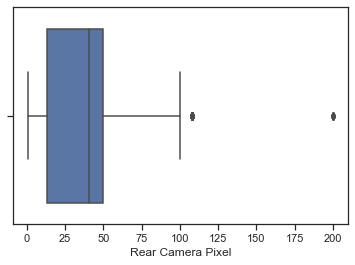

In [1715]:
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib import pyplot as plt
import seaborn as sns
import warnings
%matplotlib inline
warnings.filterwarnings("ignore")


sns.boxplot(df_copy['Rear Camera Pixel'])



In [1716]:
df_copy.head(15)

,Unnamed: 0,Title,Price,Sold,rating,Touch Screen,Rear Camera Quantity,Wireless Charging,NFC,Charging Interface Type,Front Camera Quantity,3.5mm Headphone Port,Screen Type,Rear Camera Pixel,Front Camera Pixel,Battery Capacity(mAh),Display Resolution,Display Size,Operation System,Item Condition,Design,Brand Name,Brand Name ID,Screen Type ID,Design ID
1,1,Blackview BV4900 Pro Android 12 IP68 Waterproo...,406.33,23.00,5.00,1.00,1,0,1,2.00,1,1.00,Normal Screen,13.00,5.00,5580.00,1036800.00,5.70,1,1.00,bar,BLACKVIEW,5,23,23
2,2,Unihertz TANK Larger Battery Rugged Smartphone...,1240.63,633.00,4.90,1.00,3,0,1,1.00,1,1.00,Normal Screen,108.00,32.00,2710095521266.89,2527200.00,6.81,1,1.00,Flip,unihertz,92,23,23
3,3,"Cubot P60 Smartphone 6.517"" Octa-Core Android ...",438.82,21.00,4.90,1.00,2,0,0,1.00,1,0.00,Water Drop Screen,20.00,8.00,5000.00,1152000.00,6.52,1,1.00,bar,Cubot,13,28,28
4,4,[World Premiere] Blackview Oscal S80 Rugged Ph...,658.89,260.00,4.73,1.00,3,0,1,1.00,1,0.00,Normal Screen,12.00,8.00,13000.00,2211840.00,6.58,1,1.00,bar,BLACKVIEW,5,23,23
5,5,Blackview A95 Smartphone 8GB+128GB Octa Core A...,575.71,14.00,4.80,1.00,3,0,0,1.00,1,0.00,Normal Screen,20.00,8.00,4380.00,1152000.00,6.52,1,1.00,bar,DOOGEE,16,23,23
6,6,SERVO X7 Plus Mini Smartphone Android Rugged L...,249.58,5.00,4.73,1.00,1,0,1,2.00,1,1.00,Normal Screen,8.00,2.00,3100.00,103680.00,4.00,1,1.00,bar,SERVO,61,23,23
7,7,OUKITEL WP18 Pro IP68 Rugged Phone MTK6762 And...,510.76,20.00,4.73,1.00,2,0,1,1.00,1,0.00,Normal Screen,13.00,5.00,12500.00,1036800.00,5.93,1,1.00,bar,OUKITEL,53,23,23
8,8,"Original Cellphone Xiaomi Redmi 5A Smartphone,...",168.74,438.00,4.50,1.00,1,0,0,2.00,1,1.00,Normal Screen,13.00,5.00,3000.00,921600.00,5.00,1,0.00,bar,XIAOMI,80,23,23
9,9,2023 Original Note 11 Pro Smartphone Android 5...,275.90,2.00,4.73,1.00,3,0,1,1.00,1,1.00,Normal Screen,40.66,13.75,2710095521266.89,2029517.01,6.67,0,1.00,bar,x-bo,93,23,23
10,10,Samsung Galaxy A10e Octa-core 5.83 Inches Sing...,284.84,313.00,4.50,1.00,1,0,1,1.00,1,1.00,Normal Screen,8.00,5.00,3000.00,1123200.00,5.80,1,0.00,bar,Samsung,65,23,23


In [1717]:
df_copy["Rear Camera Pixel"].describe(include='all')

count   3158.00
mean      40.66
std       30.67
min        1.00
25%       13.00
50%       40.66
75%       50.00
max      200.00
Name: Rear Camera Pixel, dtype: float64

In [1718]:
#column name to work on
col = "Rear Camera Pixel"

#calculating the IQR and the outlier range
Q1 = np.percentile(df_copy[col], 25)
Q3 = np.percentile(df_copy[col], 75)
IQR = Q3 - Q1
IQR_range = 1.5 * IQR

#identify the outlier rows
outlier_rows = df_copy[(df_copy[col] < Q1 - IQR_range) | (df_copy[col] > Q3 + IQR_range)].index

#replace the outlier values with the median
df_copy.loc[outlier_rows, col] = df_copy[col].median()


<AxesSubplot:xlabel='Rear Camera Pixel'>

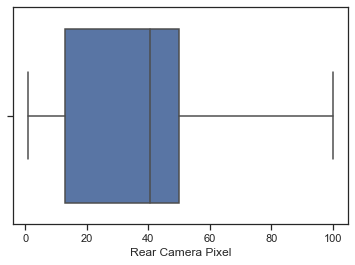

In [1719]:
sns.boxplot(df_copy['Rear Camera Pixel'])

<AxesSubplot:xlabel='Front Camera Pixel'>

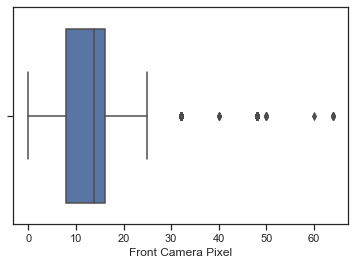

In [1720]:
sns.boxplot(df_copy['Front Camera Pixel'])

In [1721]:
col = "Front Camera Pixel"


Q1 = np.percentile(df_copy[col], 25)
Q3 = np.percentile(df_copy[col], 75)
IQR = Q3 - Q1
IQR_range = 1.5 * IQR


outlier_rows = df_copy[(df_copy[col] < Q1 - IQR_range) | (df_copy[col] > Q3 + IQR_range)].index


df_copy.loc[outlier_rows, col] = df_copy[col].median()

<AxesSubplot:xlabel='Front Camera Pixel'>

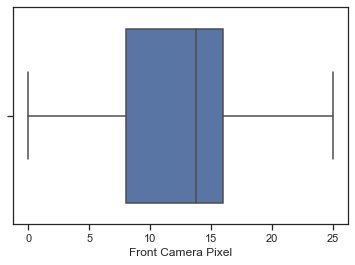

In [1722]:
sns.boxplot(df_copy['Front Camera Pixel'])

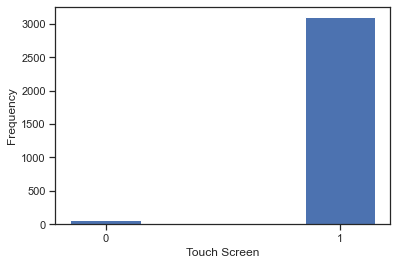

In [1723]:
touch_screen = df_copy['Touch Screen']

plt.hist(touch_screen, bins=[-0.5, 0.5, 1.5], align='mid', rwidth=0.3)

plt.xticks([0, 1], ['0', '1'])
plt.xlabel('Touch Screen')
plt.ylabel('Frequency')
plt.show()

(array([   0.,    0.,    0.,    0.,    0., 3099.,    0.,    0.,    0.,
           0.]),
 array([0.5, 0.6, 0.7, 0.8, 0.9, 1. , 1.1, 1.2, 1.3, 1.4, 1.5]),
 <BarContainer object of 10 artists>)

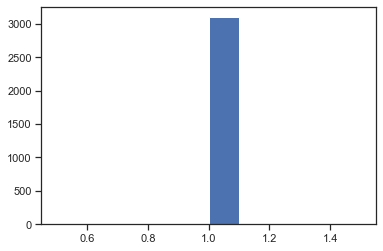

In [1724]:
#we can see that the is almost no 0 in touch screen so we removed them, they are irelevvant
df_copy = df_copy.drop(df_copy[df_copy['Touch Screen'] == 0].index)
plt.hist(df_copy['Touch Screen'])

In [1725]:
#can help us know anything so we removed it
df_copy = df_copy.drop('Touch Screen', axis=1)

<AxesSubplot:xlabel='Display Resolution'>

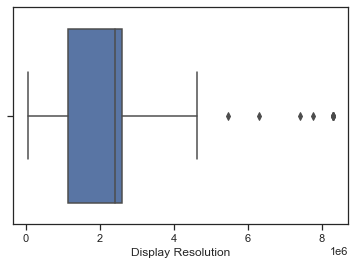

In [1726]:
#plt.hist(df_copy['Display Resolution'])
sns.boxplot(df_copy['Display Resolution'])

In [1727]:
col = "Display Resolution"

Q1 = np.percentile(df_copy[col], 25)
Q3 = np.percentile(df_copy[col], 75)
IQR = Q3 - Q1
IQR_range = 1.5 * IQR

outlier_rows = df_copy[(df_copy[col] < Q1 - IQR_range) | (df_copy[col] > Q3 + IQR_range)].index

df_copy.loc[outlier_rows, col] = df_copy[col].median()

<AxesSubplot:xlabel='Display Resolution'>

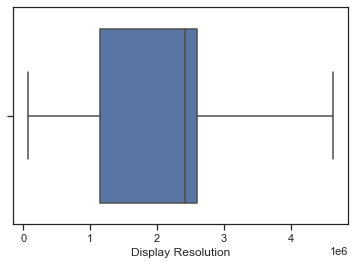

In [1728]:
#plt.hist(df_copy['Display Resolution'])
sns.boxplot(df_copy['Display Resolution'])

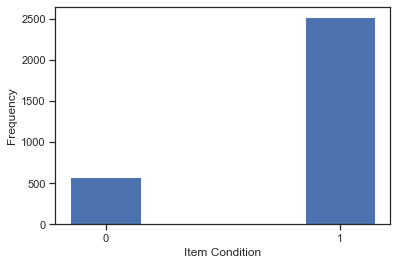

In [1732]:
touch_screen = df_copy['Item Condition']

plt.hist(touch_screen, bins=[-0.5, 0.5, 1.5], align='mid', rwidth=0.3)

plt.xticks([0, 1], ['0', '1'])
plt.xlabel('Item Condition')
plt.ylabel('Frequency')
plt.show()

In [1733]:
df_copy["Price"].describe(include='all')

count     3099.00
mean       972.72
std       9607.33
min          0.04
25%        424.23
50%        638.35
75%       1056.65
max     534574.20
Name: Price, dtype: float64

(array([3.098e+03, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00]),
 array([4.00000000e-02, 5.34574560e+04, 1.06914872e+05, 1.60372288e+05,
        2.13829704e+05, 2.67287120e+05, 3.20744536e+05, 3.74201952e+05,
        4.27659368e+05, 4.81116784e+05, 5.34574200e+05]),
 <BarContainer object of 10 artists>)

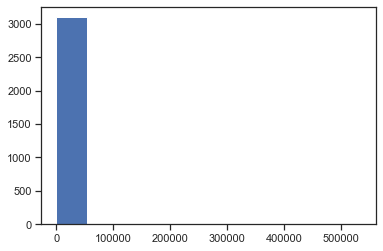

In [1734]:
plt.hist(df_copy['Price'])

<AxesSubplot:xlabel='Price'>

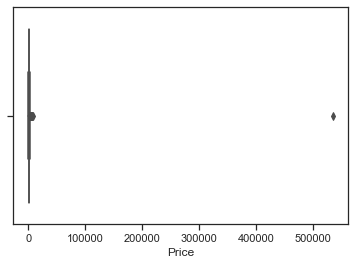

In [1735]:
sns.boxplot(df_copy['Price'])

In [1736]:
df_copy = df_copy.drop(df_copy[df_copy['Price'] > 3000].index)

<AxesSubplot:xlabel='Price'>

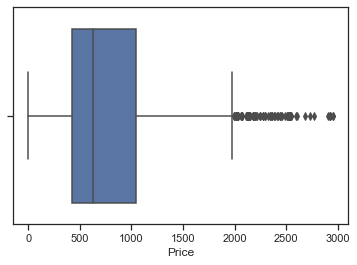

In [1737]:
sns.boxplot(df_copy['Price'])

(array([ 312., 1108.,  638.,  499.,  240.,  132.,   62.,   42.,   25.,
          10.]),
 array([4.000000e-02, 2.953840e+02, 5.907280e+02, 8.860720e+02,
        1.181416e+03, 1.476760e+03, 1.772104e+03, 2.067448e+03,
        2.362792e+03, 2.658136e+03, 2.953480e+03]),
 <BarContainer object of 10 artists>)

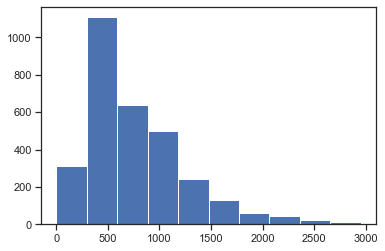

In [1738]:
plt.hist(df_copy['Price'])

In [1739]:
df_copy['Price'].value_counts()

1114.46    6
443.51     6
1094.53    6
869.05     5
453.44     5
          ..
293.35     1
81.04      1
486.39     1
926.14     1
171.00     1
Name: Price, Length: 2342, dtype: int64

In [1740]:
#we check the min price by sort the price column
sortedprice = df_copy['Price'].value_counts().sort_index()
print(sortedprice)

0.04       1
0.36       1
8.14       1
13.47      1
14.87      1
          ..
2923.67    2
2927.62    1
2928.94    1
2953.05    1
2953.48    1
Name: Price, Length: 2342, dtype: int64


In [1741]:
#we removed any phone under 300
df_copy = df_copy.drop(df_copy[df_copy['Price'] <300 ].index)

(array([1019.,  635.,  416.,  326.,  149.,   86.,   51.,   27.,   21.,
           9.]),
 array([ 300.02 ,  565.366,  830.712, 1096.058, 1361.404, 1626.75 ,
        1892.096, 2157.442, 2422.788, 2688.134, 2953.48 ]),
 <BarContainer object of 10 artists>)

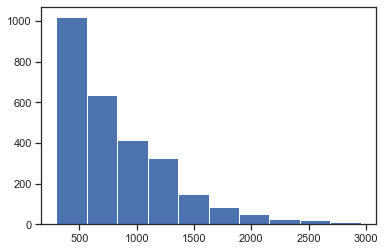

In [1742]:
plt.hist(df_copy['Price'])

(array([2601.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
         138.]),
 array([0.00000000e+00, 2.71009552e+11, 5.42019104e+11, 8.13028656e+11,
        1.08403821e+12, 1.35504776e+12, 1.62605731e+12, 1.89706686e+12,
        2.16807642e+12, 2.43908597e+12, 2.71009552e+12]),
 <BarContainer object of 10 artists>)

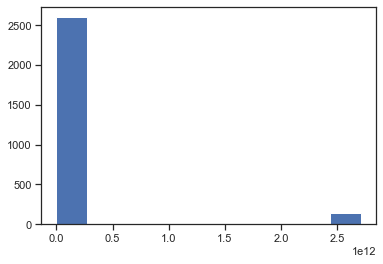

In [1743]:
plt.hist(df_copy['Battery Capacity(mAh)'])

In [1744]:
#we removed fail data, there are no phone we this kind of mah and if there are they are not relevant to our study
df_copy = df_copy.drop(df_copy[(df_copy['Battery Capacity(mAh)'] < 300) | (df_copy['Battery Capacity(mAh)'] > 10000)].index)

(array([  46.,   55.,  190.,  670., 1137.,  164.,   25.,   53.,   58.,
          89.]),
 array([ 1200.,  2080.,  2960.,  3840.,  4720.,  5600.,  6480.,  7360.,
         8240.,  9120., 10000.]),
 <BarContainer object of 10 artists>)

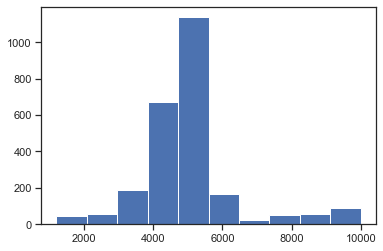

In [1745]:
plt.hist(df_copy['Battery Capacity(mAh)'])

<AxesSubplot:xlabel='Display Resolution'>

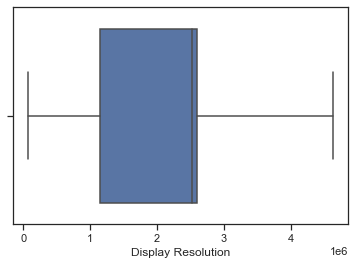

In [1746]:
sns.boxplot(df_copy['Display Resolution'])

In [1747]:
col = "Display Resolution"

Q1 = np.percentile(df_copy[col], 25)
Q3 = np.percentile(df_copy[col], 75)
IQR = Q3 - Q1
IQR_range = 1.5 * IQR

outlier_rows = df_copy[(df_copy[col] < Q1 - IQR_range) | (df_copy[col] > Q3 + IQR_range)].index

df_copy.loc[outlier_rows, col] = df_copy[col].median()

<AxesSubplot:xlabel='Display Resolution'>

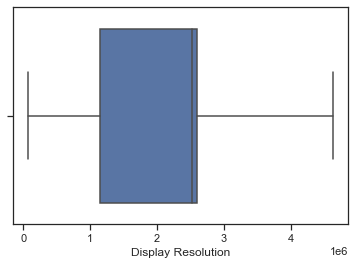

In [1748]:
sns.boxplot(df_copy['Display Resolution'])

In [1749]:
df_copy.head()

,Unnamed: 0,Title,Price,Sold,rating,Rear Camera Quantity,Wireless Charging,NFC,Charging Interface Type,Front Camera Quantity,3.5mm Headphone Port,Screen Type,Rear Camera Pixel,Front Camera Pixel,Battery Capacity(mAh),Display Resolution,Display Size,Operation System,Item Condition,Design,Brand Name,Brand Name ID,Screen Type ID,Design ID
1,1,Blackview BV4900 Pro Android 12 IP68 Waterproo...,406.33,23.00,5.00,1,0,1,2.00,1,1.00,Normal Screen,13.00,5.00,5580.00,1036800.00,5.70,1,1.00,bar,BLACKVIEW,5,23,23
3,3,"Cubot P60 Smartphone 6.517"" Octa-Core Android ...",438.82,21.00,4.90,2,0,0,1.00,1,0.00,Water Drop Screen,20.00,8.00,5000.00,1152000.00,6.52,1,1.00,bar,Cubot,13,28,28
5,5,Blackview A95 Smartphone 8GB+128GB Octa Core A...,575.71,14.00,4.80,3,0,0,1.00,1,0.00,Normal Screen,20.00,8.00,4380.00,1152000.00,6.52,1,1.00,bar,DOOGEE,16,23,23
15,15,Orginal Smartphone Xiaomi Redmi Note 8 Pro Cel...,549.46,174.00,4.80,3,0,0,1.00,1,1.00,Other,40.66,13.75,4500.00,2527200.00,6.53,1,0.00,bar,XIAOMI,80,25,25
16,16,POCO X5 5G Global Version Smartphone 128GB/256...,893.93,0.00,4.73,2,0,1,1.00,1,1.00,Fullview Display,48.00,13.00,5000.00,2592000.00,6.67,1,1.00,Flip,POCO,55,21,21


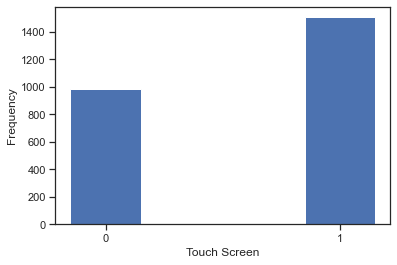

In [1750]:
touch_screen = df_copy['3.5mm Headphone Port']

plt.hist(touch_screen, bins=[-0.5, 0.5, 1.5], align='mid', rwidth=0.3)

plt.xticks([0, 1], ['0', '1'])
plt.xlabel('Touch Screen')
plt.ylabel('Frequency')
plt.show()

<AxesSubplot:xlabel='Display Size'>

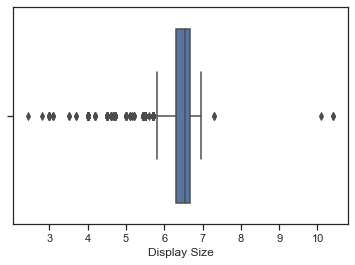

In [1751]:
sns.boxplot(df_copy['Display Size'])

<AxesSubplot:xlabel='Display Size'>

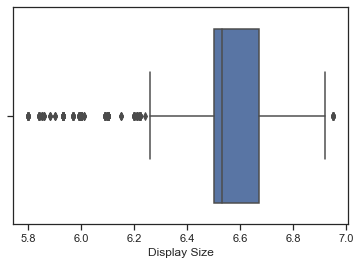

In [1752]:
#like the same on the top, we saw outliers and we fix it
col = "Display Size"

Q1 = np.percentile(df_copy[col], 25)
Q3 = np.percentile(df_copy[col], 75)
IQR = Q3 - Q1
IQR_range = 1.5 * IQR

outlier_rows = df_copy[(df_copy[col] < Q1 - IQR_range) | (df_copy[col] > Q3 + IQR_range)].index

df_copy.loc[outlier_rows, col] = df_copy[col].median()

sns.boxplot(df_copy['Display Size'])

(array([  48.,  103.,   77.,   45.,  151.,  172., 1088.,  611.,  162.,
          30.]),
 array([5.8  , 5.915, 6.03 , 6.145, 6.26 , 6.375, 6.49 , 6.605, 6.72 ,
        6.835, 6.95 ]),
 <BarContainer object of 10 artists>)

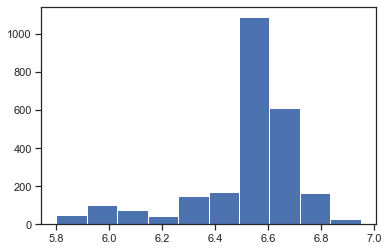

In [1753]:
plt.hist(df_copy['Display Size'])

<AxesSubplot:xlabel='Rear Camera Quantity'>

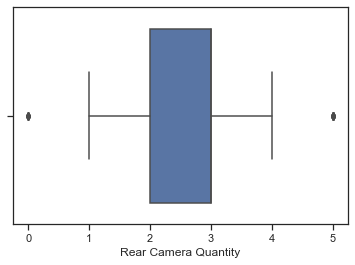

In [1754]:
sns.boxplot(df_copy['Rear Camera Quantity'])

<AxesSubplot:xlabel='Rear Camera Quantity'>

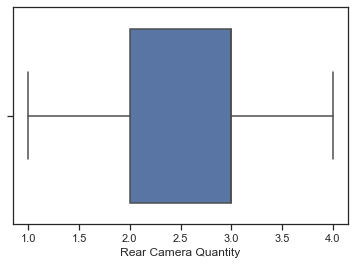

In [1755]:
col = "Rear Camera Quantity"

Q1 = np.percentile(df_copy[col], 25)
Q3 = np.percentile(df_copy[col], 75)
IQR = Q3 - Q1
IQR_range = 1.5 * IQR

outlier_rows = df_copy[(df_copy[col] < Q1 - IQR_range) | (df_copy[col] > Q3 + IQR_range)].index

df_copy.loc[outlier_rows, col] = df_copy[col].median()

sns.boxplot(df_copy['Rear Camera Quantity'])

(array([ 680.,    0.,    0., 1759.,    0.,    0.,    0.,    0.,    0.,
          48.]),
 array([0. , 0.3, 0.6, 0.9, 1.2, 1.5, 1.8, 2.1, 2.4, 2.7, 3. ]),
 <BarContainer object of 10 artists>)

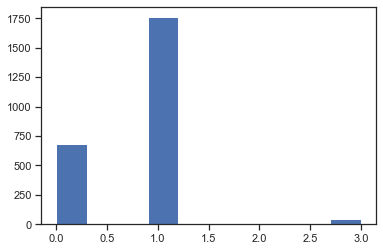

In [1756]:
plt.hist(df_copy['NFC'])

In [1757]:
# we can see that number 3 is irelevant so we removed it
df_copy = df_copy.drop(df_copy[df_copy['NFC'] ==3 ].index)

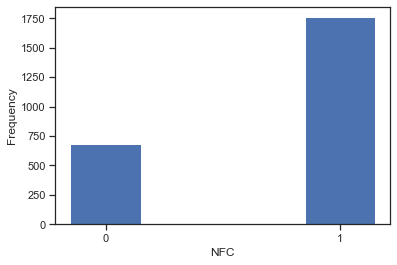

In [1758]:
touch_screen = df_copy['NFC']

plt.hist(touch_screen, bins=[-0.5, 0.5, 1.5], align='mid', rwidth=0.3)

plt.xticks([0, 1], ['0', '1'])
plt.xlabel('NFC')
plt.ylabel('Frequency')
plt.show()

(array([2132.,    0.,  215.,    0.,    0.,   44.,    0.,    0.,    0.,
          48.]),
 array([1. , 1.4, 1.8, 2.2, 2.6, 3. , 3.4, 3.8, 4.2, 4.6, 5. ]),
 <BarContainer object of 10 artists>)

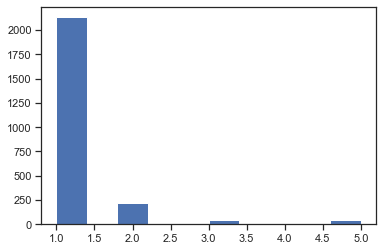

In [1759]:
plt.hist(df_copy['Charging Interface Type'])

In [1760]:
# only 1 and 2 are relevant all other no, means 2 and above
df_copy = df_copy.drop(df_copy[(df_copy['Charging Interface Type']>2)].index)

(array([2132.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
         215.]),
 array([1. , 1.1, 1.2, 1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2. ]),
 <BarContainer object of 10 artists>)

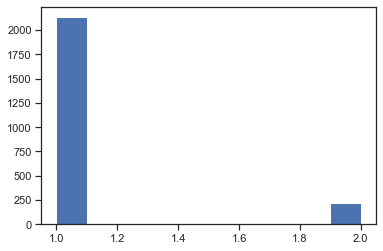

In [1761]:
plt.hist(df_copy['Charging Interface Type'])

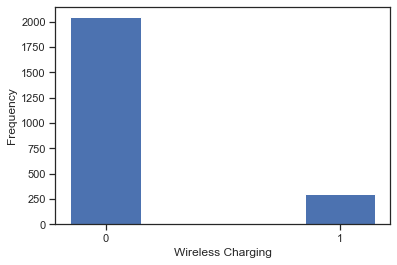

In [1762]:
touch_screen = df_copy['Wireless Charging']

plt.hist(touch_screen, bins=[-0.5, 0.5, 1.5], align='mid', rwidth=0.3)

plt.xticks([0, 1], ['0', '1'])
plt.xlabel('Wireless Charging')
plt.ylabel('Frequency')
plt.show()

<AxesSubplot:xlabel='Brand Name ID'>

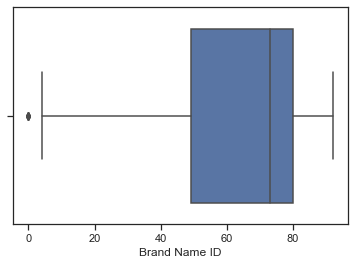

In [1763]:
sns.boxplot(df_copy['Brand Name ID'])

<AxesSubplot:xlabel='Brand Name ID'>

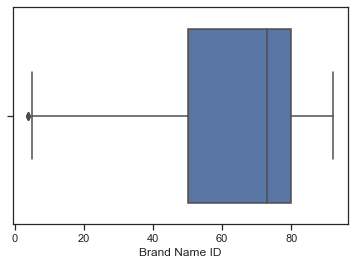

In [1764]:
col = "Brand Name ID"

Q1 = np.percentile(df_copy[col], 25)
Q3 = np.percentile(df_copy[col], 75)
IQR = Q3 - Q1
IQR_range = 1.5 * IQR

outlier_rows = df_copy[(df_copy[col] < Q1 - IQR_range) | (df_copy[col] > Q3 + IQR_range)].index

df_copy.loc[outlier_rows, col] = df_copy[col].median()

sns.boxplot(df_copy['Brand Name ID'])

<AxesSubplot:xlabel='Screen Type ID'>

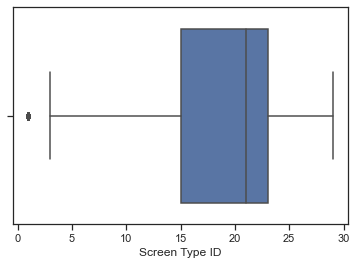

In [1766]:
sns.boxplot(df_copy['Screen Type ID'])

<AxesSubplot:xlabel='Screen Type ID'>

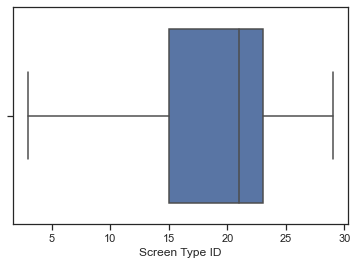

In [1767]:
col = "Screen Type ID"

Q1 = np.percentile(df_copy[col], 25)
Q3 = np.percentile(df_copy[col], 75)
IQR = Q3 - Q1
IQR_range = 1.5 * IQR

outlier_rows = df_copy[(df_copy[col] < Q1 - IQR_range) | (df_copy[col] > Q3 + IQR_range)].index

df_copy.loc[outlier_rows, col] = df_copy[col].median()

sns.boxplot(df_copy['Screen Type ID'])

<AxesSubplot:xlabel='Design ID'>

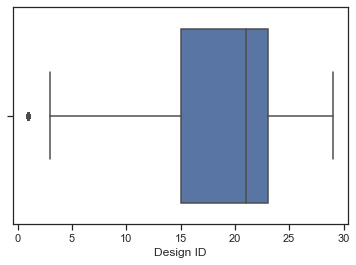

In [1768]:
sns.boxplot(df_copy['Design ID'])

<AxesSubplot:xlabel='Design ID'>

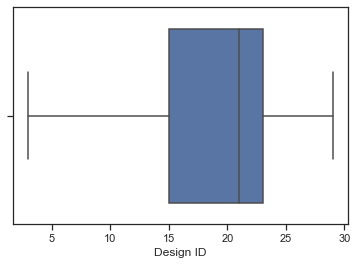

In [1769]:
col = "Design ID"

Q1 = np.percentile(df_copy[col], 25)
Q3 = np.percentile(df_copy[col], 75)
IQR = Q3 - Q1
IQR_range = 1.5 * IQR

outlier_rows = df_copy[(df_copy[col] < Q1 - IQR_range) | (df_copy[col] > Q3 + IQR_range)].index

df_copy.loc[outlier_rows, col] = df_copy[col].median()

sns.boxplot(df_copy['Design ID'])

In [1770]:
df_copy.head()

,Unnamed: 0,Title,Price,Sold,rating,Rear Camera Quantity,Wireless Charging,NFC,Charging Interface Type,Front Camera Quantity,3.5mm Headphone Port,Screen Type,Rear Camera Pixel,Front Camera Pixel,Battery Capacity(mAh),Display Resolution,Display Size,Operation System,Item Condition,Design,Brand Name,Brand Name ID,Screen Type ID,Design ID
1,1,Blackview BV4900 Pro Android 12 IP68 Waterproo...,406.33,23.00,5.00,1,0,1,2.00,1,1.00,Normal Screen,13.00,5.00,5580.00,1036800.00,6.53,1,1.00,bar,BLACKVIEW,5.00,23.00,23.00
3,3,"Cubot P60 Smartphone 6.517"" Octa-Core Android ...",438.82,21.00,4.90,2,0,0,1.00,1,0.00,Water Drop Screen,20.00,8.00,5000.00,1152000.00,6.52,1,1.00,bar,Cubot,13.00,28.00,28.00
5,5,Blackview A95 Smartphone 8GB+128GB Octa Core A...,575.71,14.00,4.80,3,0,0,1.00,1,0.00,Normal Screen,20.00,8.00,4380.00,1152000.00,6.52,1,1.00,bar,DOOGEE,16.00,23.00,23.00
15,15,Orginal Smartphone Xiaomi Redmi Note 8 Pro Cel...,549.46,174.00,4.80,3,0,0,1.00,1,1.00,Other,40.66,13.75,4500.00,2527200.00,6.53,1,0.00,bar,XIAOMI,80.00,25.00,25.00
16,16,POCO X5 5G Global Version Smartphone 128GB/256...,893.93,0.00,4.73,2,0,1,1.00,1,1.00,Fullview Display,48.00,13.00,5000.00,2592000.00,6.67,1,1.00,Flip,POCO,55.00,21.00,21.00


(array([  26.,   29.,  177.,  652., 1098.,  160.,   25.,   49.,   51.,
          80.]),
 array([ 1200.,  2080.,  2960.,  3840.,  4720.,  5600.,  6480.,  7360.,
         8240.,  9120., 10000.]),
 <BarContainer object of 10 artists>)

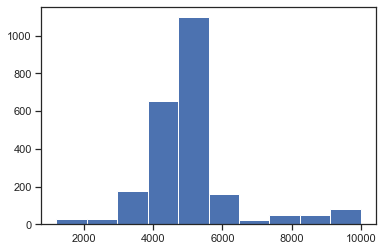

In [1771]:
plt.hist(df_copy['Battery Capacity(mAh)'])

In [1772]:
#doing more fixing to battery
df_copy = df_copy.drop(df_copy[(df_copy['Battery Capacity(mAh)'] < 1500) | (df_copy['Battery Capacity(mAh)'] > 7000)].index)

(array([  25.,   21.,  110.,   74.,  249.,  423., 1017.,   63.,  139.,
          40.]),
 array([1820., 2318., 2816., 3314., 3812., 4310., 4808., 5306., 5804.,
        6302., 6800.]),
 <BarContainer object of 10 artists>)

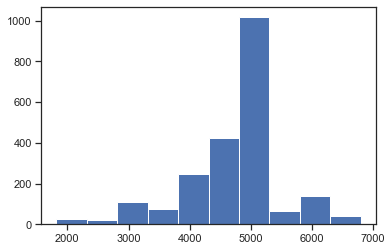

In [1773]:
plt.hist(df_copy['Battery Capacity(mAh)'])

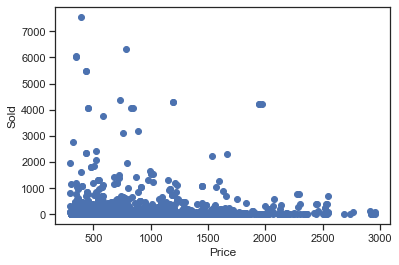

In [1774]:
#We watched scatter plot to get more vision and info about our data
price_clipped = df_copy['Price']

plt.scatter( price_clipped,df_copy['Sold'])
plt.xlabel('Price')
plt.ylabel('Sold')
plt.show()

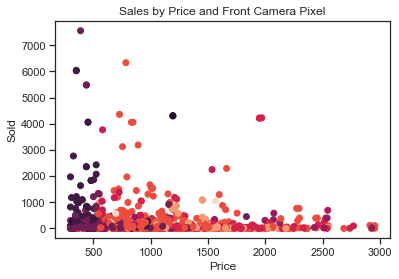

In [1775]:
plt.scatter(df_copy['Price'], df_copy['Sold'], c=df_copy['Front Camera Pixel'])
plt.xlabel('Price')
plt.ylabel('Sold')
plt.title('Sales by Price and Front Camera Pixel')
plt.show()

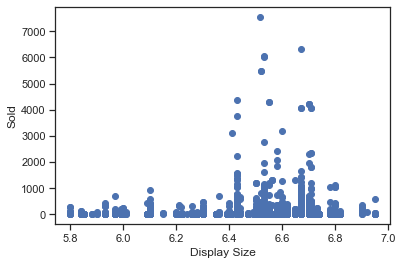

In [1776]:
#plt.scatter(df_copy['Display Size'],df_copy['Sold'] )
plt.scatter(df_copy['Display Size'],df_copy['Sold'] )
plt.xlabel('Display Size')
plt.ylabel('Sold')
plt.show()

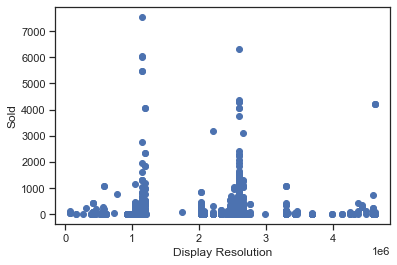

In [1777]:
plt.scatter(df_copy['Display Resolution'],df_copy['Sold'] )
plt.xlabel('Display Resolution')
plt.ylabel('Sold')
plt.show()

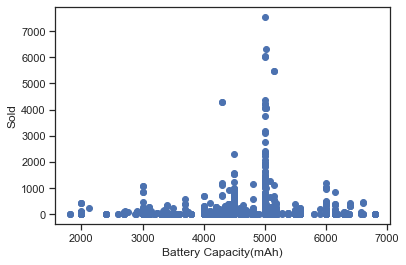

In [1778]:
plt.scatter(df_copy['Battery Capacity(mAh)'],df_copy['Sold'])
plt.ylabel('Sold')
plt.xlabel('Battery Capacity(mAh)')
plt.show()

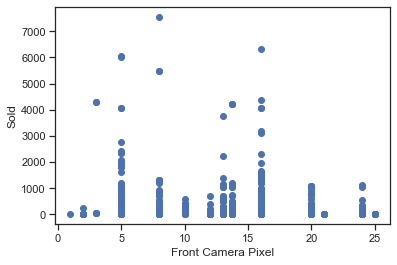

In [1779]:
plt.scatter(df_copy['Front Camera Pixel'],df_copy['Sold'] )
plt.ylabel('Sold')
plt.xlabel('Front Camera Pixel')
plt.show()

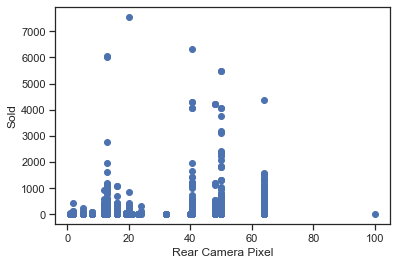

In [1780]:
plt.scatter(df_copy['Rear Camera Pixel'],df_copy['Sold'])
plt.ylabel('Sold')
plt.xlabel('Rear Camera Pixel')
plt.show()

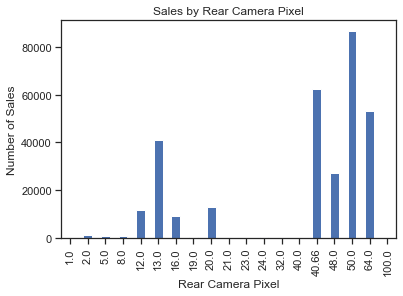

In [1781]:
#group the data by the "Rear Camera Pixel" column and sum the sold column for each group
grouped_data = df_copy.groupby('Rear Camera Pixel')['Sold'].sum()

#create the bar plot with the data we group by
grouped_data.plot(kind='bar', stacked=True)

plt.xlabel('Rear Camera Pixel')
plt.ylabel('Number of Sales')
plt.title('Sales by Rear Camera Pixel')
plt.show()

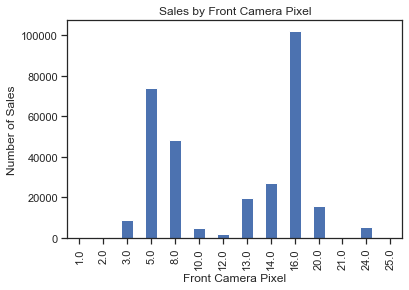

In [1783]:
grouped_data = df_copy.groupby('Front Camera Pixel')['Sold'].sum()
ax = grouped_data.plot(kind='bar')

ax.set_xlabel('Front Camera Pixel')
ax.set_ylabel('Number of Sales')
ax.set_title('Sales by Front Camera Pixel')
ax.set_xticklabels(np.around(grouped_data.index))

#format the y line to display only integer values
ax.yaxis.set_major_formatter(mtick.FormatStrFormatter('%d'))
plt.show()


In [1784]:
df_copy.head()

,Unnamed: 0,Title,Price,Sold,rating,Rear Camera Quantity,Wireless Charging,NFC,Charging Interface Type,Front Camera Quantity,3.5mm Headphone Port,Screen Type,Rear Camera Pixel,Front Camera Pixel,Battery Capacity(mAh),Display Resolution,Display Size,Operation System,Item Condition,Design,Brand Name,Brand Name ID,Screen Type ID,Design ID
1,1,Blackview BV4900 Pro Android 12 IP68 Waterproo...,406.33,23.00,5.00,1,0,1,2.00,1,1.00,Normal Screen,13.00,5.00,5580.00,1036800.00,6.53,1,1.00,bar,BLACKVIEW,5.00,23.00,23.00
3,3,"Cubot P60 Smartphone 6.517"" Octa-Core Android ...",438.82,21.00,4.90,2,0,0,1.00,1,0.00,Water Drop Screen,20.00,8.00,5000.00,1152000.00,6.52,1,1.00,bar,Cubot,13.00,28.00,28.00
5,5,Blackview A95 Smartphone 8GB+128GB Octa Core A...,575.71,14.00,4.80,3,0,0,1.00,1,0.00,Normal Screen,20.00,8.00,4380.00,1152000.00,6.52,1,1.00,bar,DOOGEE,16.00,23.00,23.00
15,15,Orginal Smartphone Xiaomi Redmi Note 8 Pro Cel...,549.46,174.00,4.80,3,0,0,1.00,1,1.00,Other,40.66,13.75,4500.00,2527200.00,6.53,1,0.00,bar,XIAOMI,80.00,25.00,25.00
16,16,POCO X5 5G Global Version Smartphone 128GB/256...,893.93,0.00,4.73,2,0,1,1.00,1,1.00,Fullview Display,48.00,13.00,5000.00,2592000.00,6.67,1,1.00,Flip,POCO,55.00,21.00,21.00


In [1785]:
df_copy.shape

(2161, 24)

In [1786]:
df_copy.describe(include='all')

,Unnamed: 0,Title,Price,Sold,rating,Rear Camera Quantity,Wireless Charging,NFC,Charging Interface Type,Front Camera Quantity,3.5mm Headphone Port,Screen Type,Rear Camera Pixel,Front Camera Pixel,Battery Capacity(mAh),Display Resolution,Display Size,Operation System,Item Condition,Design,Brand Name,Brand Name ID,Screen Type ID,Design ID
count,2161.00,2161,2161.00,2161.00,2161.00,2161.00,2161.00,2161.00,2161.00,2161.00,2161.00,2161,2161.00,2161.00,2161.00,2161.00,2161.00,2161.00,2161.00,2161,2161,2161.00,2161.00,2161.00
unique,nan,1397,nan,nan,nan,nan,nan,nan,nan,nan,nan,22,nan,nan,nan,nan,nan,nan,nan,8,47,nan,nan,nan
top,nan,Global Version Rino9 Pro Smartphones 5G 6.7Inc...,nan,nan,nan,nan,nan,nan,nan,nan,nan,Fullview Display,nan,nan,nan,nan,nan,nan,nan,bar,XIAOMI,nan,nan,nan
freq,nan,7,nan,nan,nan,nan,nan,nan,nan,nan,nan,547,nan,nan,nan,nan,nan,nan,nan,1982,809,nan,nan,nan
mean,1685.97,NaN,841.33,142.61,4.75,2.69,0.13,0.70,1.10,1.07,0.63,NaN,36.63,12.50,4727.61,2178750.75,6.52,0.98,0.85,NaN,NaN,62.40,21.04,21.04
std,883.89,NaN,483.84,511.05,0.44,0.90,0.33,0.46,0.30,0.38,0.48,NaN,19.18,5.37,789.69,834796.54,0.21,0.15,0.36,NaN,NaN,26.79,4.86,4.86
min,1.00,NaN,300.02,0.00,1.00,1.00,0.00,0.00,1.00,0.00,0.00,NaN,1.00,1.00,1820.00,76800.00,5.80,0.00,0.00,NaN,NaN,4.00,3.00,3.00
25%,945.00,NaN,476.20,3.00,4.73,2.00,0.00,0.00,1.00,1.00,0.00,NaN,16.00,8.00,4480.00,1152000.00,6.50,1.00,1.00,NaN,NaN,52.00,15.00,15.00
50%,1728.00,NaN,677.53,15.00,4.80,3.00,0.00,1.00,1.00,1.00,1.00,NaN,40.66,13.75,5000.00,2527200.00,6.53,1.00,1.00,NaN,NaN,80.00,21.00,21.00
75%,2440.00,NaN,1097.56,72.00,5.00,3.00,0.00,1.00,1.00,1.00,1.00,NaN,50.00,16.00,5000.00,2592000.00,6.67,1.00,1.00,NaN,NaN,80.00,23.00,23.00


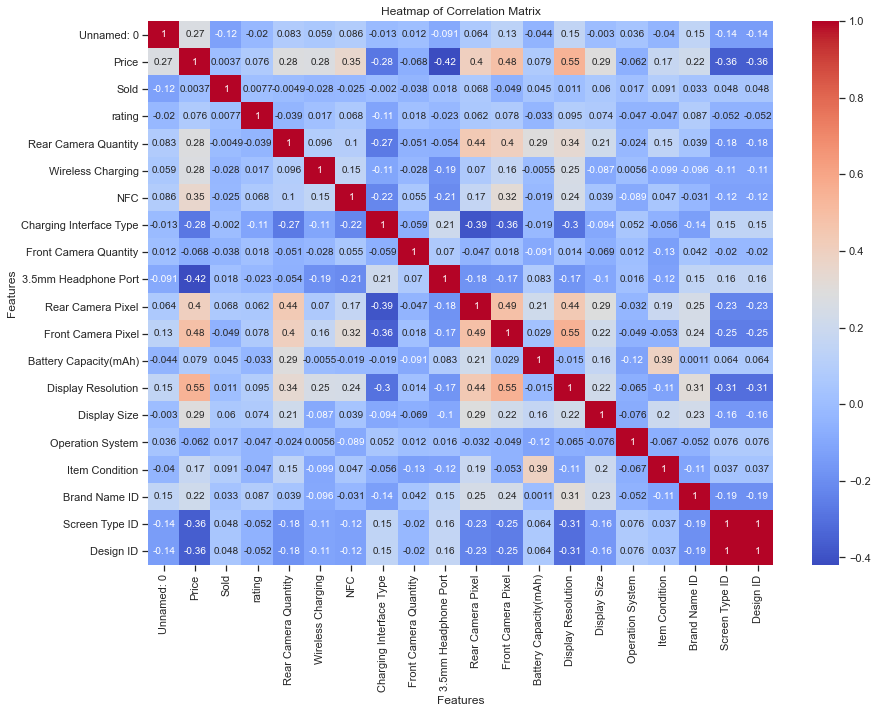

In [1787]:
import seaborn as sns
#heatmap for checking and looking for any correlation in our data
plt.figure(figsize=(14, 10))

sns.heatmap(df_copy.corr(), cmap='coolwarm', annot=True)

plt.title('Heatmap of Correlation Matrix')
plt.xlabel('Features')
plt.ylabel('Features')

plt.show()

# decision tree

In [1788]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

#define input features and output target - all numeric columns
X = df_copy[['Price', 'rating', 'Rear Camera Quantity', 'Wireless Charging', 'NFC', 'Charging Interface Type', 'Front Camera Quantity', '3.5mm Headphone Port', 'Rear Camera Pixel', 'Front Camera Pixel', 'Battery Capacity(mAh)', 'Display Resolution', 'Display Size', 'Operation System', 'Item Condition', 'Brand Name ID', 'Screen Type ID', 'Design ID']]
y = df_copy['Sold']

#split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# train the decision tree model
dt = DecisionTreeRegressor(max_depth=5)
dt.fit(X_train, y_train)

#evaluation
y_pred = dt.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("Decision Tree Regression mean squared error:", mse)
print('R-squared:', r2)

Decision Tree Regression mean squared error: 267393.80806797737
R-squared: 0.1510511729816174


In [1789]:
#here is with part of the columns
#split the data into training and testing sets
X = df_copy[['Battery Capacity(mAh)', 'Rear Camera Pixel', 'Front Camera Pixel', 'rating', 'Price']]
y = df_copy['Sold']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#train the decision tree model
dt = DecisionTreeRegressor(max_depth=5, random_state=42)
dt.fit(X_train, y_train)

#make predictions on the test set
y_pred = dt.predict(X_test)

#evaluation
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print('MSE:', mse)
print('R-squared:', r2)

MSE: 389098.3421800558
R-squared: 0.10258861990717094


# Random Forest

In [1790]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

#define input features and output target
X = df_copy[['Price', 'rating', 'Rear Camera Quantity', 'Wireless Charging', 'NFC', 'Charging Interface Type', 'Front Camera Quantity', '3.5mm Headphone Port', 'Rear Camera Pixel', 'Front Camera Pixel', 'Battery Capacity(mAh)', 'Display Resolution', 'Display Size', 'Operation System', 'Item Condition', 'Brand Name ID', 'Screen Type ID', 'Design ID']]
y = df_copy['Sold']

#split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

#create Random Forest Regression model
rf = RandomForestRegressor(n_estimators=100, max_depth=5, random_state=42)
rf.fit(X_train, y_train)

#evaluation
y_pred = rf.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("Random Forest Regression mean squared error:", mse)
print('R-squared:', r2)

Random Forest Regression mean squared error: 257001.93934703263
R-squared: 0.1840443257584845


In [1791]:
#less columns like on the decision tree on top
X = df_copy[['Battery Capacity(mAh)', 'Rear Camera Pixel', 'Front Camera Pixel', 'rating', 'Price']]
y = df_copy['Sold']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

rf = RandomForestRegressor(n_estimators=100, max_depth=5, random_state=42)
rf.fit(X_train, y_train)

y_pred = rf.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("Random Forest Regression mean squared error:", mse)
print('R-squared:', r2)

Random Forest Regression mean squared error: 256472.13553846517
R-squared: 0.18572640031766385


In [1792]:
#changing the max depth number
X = df_copy[['Price', 'rating', 'Rear Camera Quantity', 'Wireless Charging', 'NFC', 'Charging Interface Type', 'Front Camera Quantity', '3.5mm Headphone Port', 'Rear Camera Pixel', 'Front Camera Pixel', 'Battery Capacity(mAh)', 'Display Resolution', 'Display Size', 'Operation System', 'Item Condition', 'Brand Name ID', 'Screen Type ID', 'Design ID']]
y = df_copy['Sold']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

rf = RandomForestRegressor(n_estimators=100, max_depth=7, random_state=42)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print('R-squared:', r2)

R-squared: 0.32861841471428355


# Normelize new DF for trying get better scores


In [1793]:
df_copy2 = df_copy.copy()

In [1794]:
df_copy2.head()

,Unnamed: 0,Title,Price,Sold,rating,Rear Camera Quantity,Wireless Charging,NFC,Charging Interface Type,Front Camera Quantity,3.5mm Headphone Port,Screen Type,Rear Camera Pixel,Front Camera Pixel,Battery Capacity(mAh),Display Resolution,Display Size,Operation System,Item Condition,Design,Brand Name,Brand Name ID,Screen Type ID,Design ID
1,1,Blackview BV4900 Pro Android 12 IP68 Waterproo...,406.33,23.00,5.00,1,0,1,2.00,1,1.00,Normal Screen,13.00,5.00,5580.00,1036800.00,6.53,1,1.00,bar,BLACKVIEW,5.00,23.00,23.00
3,3,"Cubot P60 Smartphone 6.517"" Octa-Core Android ...",438.82,21.00,4.90,2,0,0,1.00,1,0.00,Water Drop Screen,20.00,8.00,5000.00,1152000.00,6.52,1,1.00,bar,Cubot,13.00,28.00,28.00
5,5,Blackview A95 Smartphone 8GB+128GB Octa Core A...,575.71,14.00,4.80,3,0,0,1.00,1,0.00,Normal Screen,20.00,8.00,4380.00,1152000.00,6.52,1,1.00,bar,DOOGEE,16.00,23.00,23.00
15,15,Orginal Smartphone Xiaomi Redmi Note 8 Pro Cel...,549.46,174.00,4.80,3,0,0,1.00,1,1.00,Other,40.66,13.75,4500.00,2527200.00,6.53,1,0.00,bar,XIAOMI,80.00,25.00,25.00
16,16,POCO X5 5G Global Version Smartphone 128GB/256...,893.93,0.00,4.73,2,0,1,1.00,1,1.00,Fullview Display,48.00,13.00,5000.00,2592000.00,6.67,1,1.00,Flip,POCO,55.00,21.00,21.00


In [1795]:
df_copy2['Operation System'].value_counts()

1    2109
0      52
Name: Operation System, dtype: int64

In [1796]:
#delete rows where 'Operation System' column contains 0 or 2
df_copy2 = df_copy2.drop(df_copy2[(df_copy2['Operation System'] == 0) | (df_copy2['Operation System'] == 2)].index)

In [1797]:
df_copy2['Operation System'].value_counts()

1    2109
Name: Operation System, dtype: int64

50.00     381
40.66     328
64.00     305
13.00     296
48.00     286
12.00     129
16.00     128
20.00     117
8.00       56
2.00       25
5.00       19
19.00      11
32.00       7
23.00       5
40.00       5
24.00       4
21.00       4
1.00        2
100.00      1
Name: Rear Camera Pixel, dtype: int64

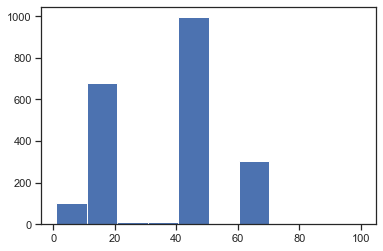

In [1798]:
plt.hist(df_copy2['Rear Camera Pixel'])
df_copy2['Rear Camera Pixel'].value_counts()

In [1799]:
#get the value counts of 'Rear Camera Pixel' column
vc_rcp = df_copy2['Rear Camera Pixel'].value_counts()
#select the values with count greater than or equal to 350
values_to_keep = vc_rcp[vc_rcp >= 350].index
#delete rows where 'Rear Camera Pixel' column is not in the selected values
df_copy2 = df_copy2[df_copy2['Rear Camera Pixel'].isin(values_to_keep)]

(array([  0.,   0.,   0.,   0.,   0., 381.,   0.,   0.,   0.,   0.]),
 array([49.5, 49.6, 49.7, 49.8, 49.9, 50. , 50.1, 50.2, 50.3, 50.4, 50.5]),
 <BarContainer object of 10 artists>)

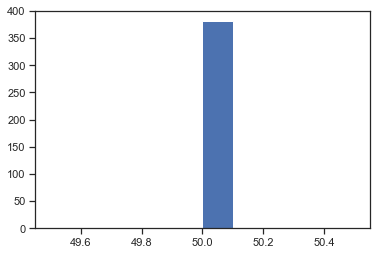

In [1800]:
plt.hist(df_copy2['Rear Camera Pixel'])

(array([ 69.,   0.,  89.,   0.,   3.,  86.,   0., 128.,   0.,   6.]),
 array([ 5. ,  6.5,  8. ,  9.5, 11. , 12.5, 14. , 15.5, 17. , 18.5, 20. ]),
 <BarContainer object of 10 artists>)

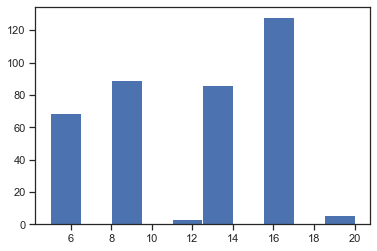

In [1801]:
plt.hist(df_copy2['Front Camera Pixel'])

In [1802]:
from sklearn.preprocessing import MinMaxScaler

#select the columns to normalize
cols_to_normalize = ['Price', 'rating',  'Rear Camera Quantity',
                     'Wireless Charging', 'NFC', 
                     'Front Camera Quantity', '3.5mm Headphone Port',
                     'Rear Camera Pixel', 'Front Camera Pixel', 'Battery Capacity(mAh)',
                     'Display Resolution', 'Display Size', 'Operation System',
                      'Brand Name ID',
                     'Screen Type ID', 'Design ID']

#create a copy of the DataFrame to normalize
df_norm = df_copy2.copy()

#instantiate the MinMaxScaler object
scaler = MinMaxScaler()

#normalize the selected columns
df_norm[cols_to_normalize] = scaler.fit_transform(df_norm[cols_to_normalize])


In [1803]:
df_norm.head()

,Unnamed: 0,Title,Price,Sold,rating,Rear Camera Quantity,Wireless Charging,NFC,Charging Interface Type,Front Camera Quantity,3.5mm Headphone Port,Screen Type,Rear Camera Pixel,Front Camera Pixel,Battery Capacity(mAh),Display Resolution,Display Size,Operation System,Item Condition,Design,Brand Name,Brand Name ID,Screen Type ID,Design ID
23,23,2022 UMIDIGI C1 Max&G1 Max Smartphone Unisoc T...,0.04,52.00,0.82,0.00,0.00,0.00,1.00,0.25,1.00,Water Drop Screen,0.00,0.20,0.53,0.13,0.65,0.00,1.00,bar,UMIDIGI,0.79,1.00,1.00
47,47,"BLACKVIEW OSCAL C80 Smartphone 8GB+128GB 6.5"" ...",0.06,0.00,0.93,0.50,0.00,0.00,1.00,0.25,1.00,Water Drop Screen,0.00,0.20,0.54,0.13,0.63,0.00,1.00,bar,BLACKVIEW,0.00,1.00,1.00
53,53,Blackview BV9200 Rugged Smartphone Android 12 ...,0.24,0.00,0.93,0.50,1.00,1.00,1.00,0.25,0.00,Water Drop Screen,0.00,0.73,0.44,0.49,0.75,0.00,1.00,bar,BLACKVIEW,0.00,1.00,1.00
65,65,infinix Hot 20 5G NFC Smartphone 4/128GB Mobil...,0.11,7.00,1.00,0.00,0.00,1.00,1.00,0.25,1.00,Water Drop Screen,0.00,0.20,0.44,0.49,0.75,0.00,1.00,Flip,Infinix,0.34,1.00,1.00
73,73,Blackview BV9200 Waterproof 8GB+256GB Helio G9...,0.22,2.00,0.93,0.50,1.00,1.00,1.00,0.25,0.00,Normal Screen,0.00,0.73,0.44,0.49,0.75,0.00,1.00,bar,BLACKVIEW,0.00,0.80,0.80


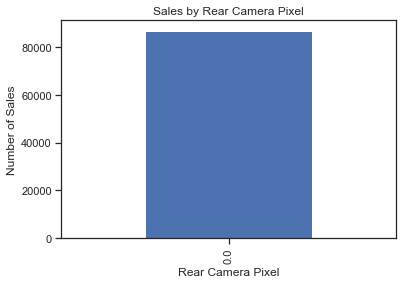

In [1804]:
# group the data by the "Rear Camera Pixel" column and sum the "Sold" column for each group
grouped_data = df_norm.groupby('Rear Camera Pixel')['Sold'].sum()

# create the bar plot with a stacked bar for each group
grouped_data.plot(kind='bar', stacked=True)

# set the axis labels and title
plt.xlabel('Rear Camera Pixel')
plt.ylabel('Number of Sales')
plt.title('Sales by Rear Camera Pixel')

# display the plot
plt.show()

In [1812]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

# Define input features and output target
X = df_norm[['Price', 'rating', 'Rear Camera Quantity', 'Wireless Charging', 'NFC', 'Charging Interface Type', 'Front Camera Quantity', '3.5mm Headphone Port', 'Rear Camera Pixel', 'Front Camera Pixel', 'Battery Capacity(mAh)', 'Display Resolution', 'Display Size', 'Operation System', 'Item Condition', 'Brand Name ID', 'Screen Type ID', 'Design ID']]
y = df_norm['Sold']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create Random Forest Regression model and fit to training data
rf = RandomForestRegressor(n_estimators=100, max_depth=5, random_state=42)
rf.fit(X_train, y_train)

# Make predictions on test data and calculate mean squared error
y_pred = rf.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("Random Forest Regression mean squared error:", mse)
print('R-squared:', r2)

Random Forest Regression mean squared error: 459906.7122908543
R-squared: 0.017908449835038587


In [1811]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

# Define input features and output target
X = df_norm[['Price', 'rating', 'Rear Camera Quantity', 'Wireless Charging', 'NFC', 'Charging Interface Type', 'Front Camera Quantity', '3.5mm Headphone Port', 'Rear Camera Pixel', 'Front Camera Pixel', 'Battery Capacity(mAh)', 'Display Resolution', 'Display Size', 'Operation System', 'Item Condition', 'Brand Name ID', 'Screen Type ID', 'Design ID']]
y = df_norm['Sold']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create Decision Tree Regression model and fit to training data
dt = DecisionTreeRegressor(max_depth=5)
dt.fit(X_train, y_train)

# Make predictions on test data and calculate mean squared error
y_pred = dt.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("Decision Tree Regression mean squared error:", mse)
print('R-squared:', r2)

Decision Tree Regression mean squared error: 846801.3624796517
R-squared: -0.8082720702573676


# dummies

In [1807]:
#columns for the machine learning
X = df_copy[['Price', 'rating', 'Rear Camera Quantity', 'Wireless Charging', 'NFC', 'Charging Interface Type', 'Front Camera Quantity', '3.5mm Headphone Port', 'Rear Camera Pixel', 'Front Camera Pixel', 'Battery Capacity(mAh)', 'Display Resolution', 'Display Size', 'Operation System', 'Item Condition', 'Brand Name ID', 'Screen Type ID', 'Design ID']]
y = df_copy['Sold']

#create dummy variables for categorical features
cat_cols = ['Charging Interface Type', 'Operation System', 'Item Condition']
X = pd.get_dummies(X, columns=cat_cols)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create Random Forest Regression model and fit to training data
rf = RandomForestRegressor(n_estimators=100, max_depth=5, random_state=42)
rf.fit(X_train, y_train)

# Make predictions on test data and calculate mean squared error
y_pred = rf.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print('R-squared:', r2)


R-squared: 0.18396609671494835


In [1810]:
# Select the input features and output target
X = df_copy[['Price', 'rating', 'Rear Camera Quantity', 'Wireless Charging', 'NFC', 'Charging Interface Type', 'Front Camera Quantity', '3.5mm Headphone Port', 'Rear Camera Pixel', 'Front Camera Pixel', 'Battery Capacity(mAh)', 'Display Resolution', 'Display Size', 'Operation System', 'Item Condition', 'Brand Name ID', 'Screen Type ID', 'Design ID']]
y = df_copy['Sold']

# Create dummy variables for categorical features
cat_cols = ['Charging Interface Type', 'Operation System', 'Item Condition']
X = pd.get_dummies(X, columns=cat_cols)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# KNN Regression
knn = DecisionTreeRegressor(max_depth=5)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print('R-squared knn:', r2)

# Decision Tree Regression
dt = DecisionTreeRegressor(max_depth=5, random_state=42)
dt.fit(X_train, y_train)
y_pred = dt.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
#print("Decision Tree Regression mean squared error:", mse)
print('R-squared:', r2)


R-squared knn: 0.15112477839128047
R-squared: 0.1510511729816174
